# Moving Average - pre-COVID

In [1]:
import pickle

df_flu = pickle.load(open(r"..\data\flu_cases\df_flu.pkl", "rb" ))
df_flu_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_pre_COVID.pkl", "rb" ))

In [2]:
df_flu_pre_COVID.head()

,Surveillance Week,A(H1N1)pdm09,A(H3N2),A(Unsubtyped),Influenza B,Year,Total Cases,Epiweek,Week Ending
0,35,1.0,2.0,3.0,3.0,2015,9.0,201535,2015-09-05
1,36,2.0,11.0,5.0,0.0,2015,18.0,201536,2015-09-12
2,37,0.0,10.0,4.0,1.0,2015,15.0,201537,2015-09-19
3,38,0.0,16.0,13.0,0.0,2015,29.0,201538,2015-09-26
4,39,6.0,34.0,13.0,6.0,2015,59.0,201539,2015-10-03


In [3]:
df_flu_pre_COVID = df_flu_pre_COVID[['Week Ending','Total Cases']]

In [4]:
df_flu_pre_COVID = df_flu_pre_COVID.set_index('Week Ending')
df_flu_pre_COVID.head()

,Total Cases
Week Ending,
2015-09-05,9.0
2015-09-12,18.0
2015-09-19,15.0
2015-09-26,29.0
2015-10-03,59.0


In [6]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = df_flu_pre_COVID
df = DataFrame(series.values)
width = 4
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't-1', 't+1']
print(dataframe.head(10))

    mean   t-1   t+1
0    NaN   NaN   9.0
1    NaN   9.0  18.0
2    NaN  18.0  15.0
3    NaN  15.0  29.0
4    NaN  29.0  59.0
5    NaN  59.0  50.0
6  17.75  50.0  37.0
7  30.25  37.0  26.0
8  38.25  26.0  26.0
9  43.75  26.0  40.0


predicted=17.750000, expected=59.000000
predicted=30.250000, expected=50.000000
predicted=38.250000, expected=37.000000
predicted=43.750000, expected=26.000000
predicted=43.000000, expected=26.000000
predicted=34.750000, expected=40.000000
predicted=32.250000, expected=45.000000
predicted=34.250000, expected=53.000000
predicted=41.000000, expected=52.000000
predicted=47.500000, expected=30.000000
predicted=45.000000, expected=63.000000
predicted=49.500000, expected=95.000000
predicted=60.000000, expected=115.000000
predicted=75.750000, expected=183.000000
predicted=114.000000, expected=314.000000
predicted=176.750000, expected=375.000000
predicted=246.750000, expected=645.000000
predicted=379.250000, expected=933.000000
predicted=566.750000, expected=1386.000000
predicted=834.750000, expected=2067.000000
predicted=1257.750000, expected=2484.000000
predicted=1717.500000, expected=3697.000000
predicted=2408.500000, expected=4193.000000
predicted=3110.250000, expected=4655.000000
predicte

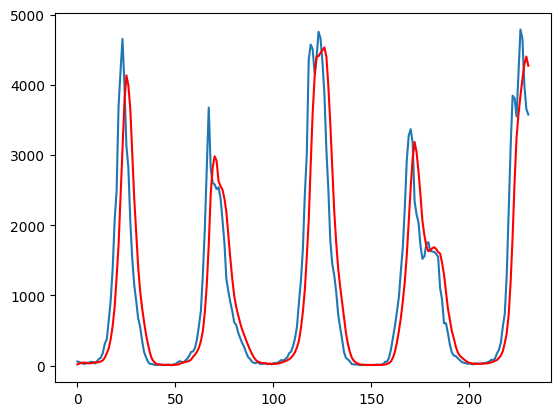

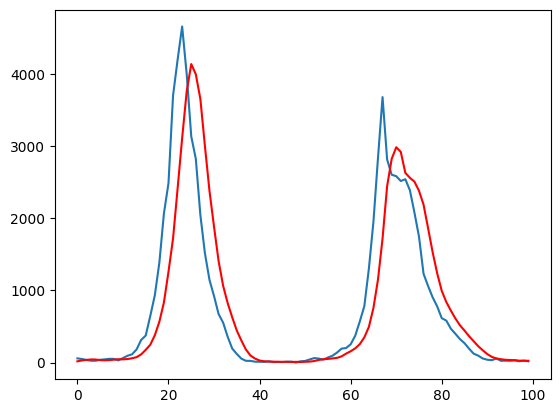

In [7]:
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
series = df_flu_pre_COVID
# prepare situation
X = series.values
window = 4
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[0:100])
pyplot.plot(predictions[0:100], color='red')
pyplot.show()

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import prophet
from prophet import Prophet

In [ ]:
wmt = df_flu_pre_COVID
wmt = wmt.reset_index('Week Ending')
wmt.head()

,Week Ending,Total Cases
0,2015-09-05,9.0
1,2015-09-12,18.0
2,2015-09-19,15.0
3,2015-09-26,29.0
4,2015-10-03,59.0


In [ ]:
wmt.rename(columns={'Week Ending':'ds','Total Cases':'y'}, inplace=True)

In [ ]:
wmt['ds'] = pd.to_datetime(wmt['ds'])

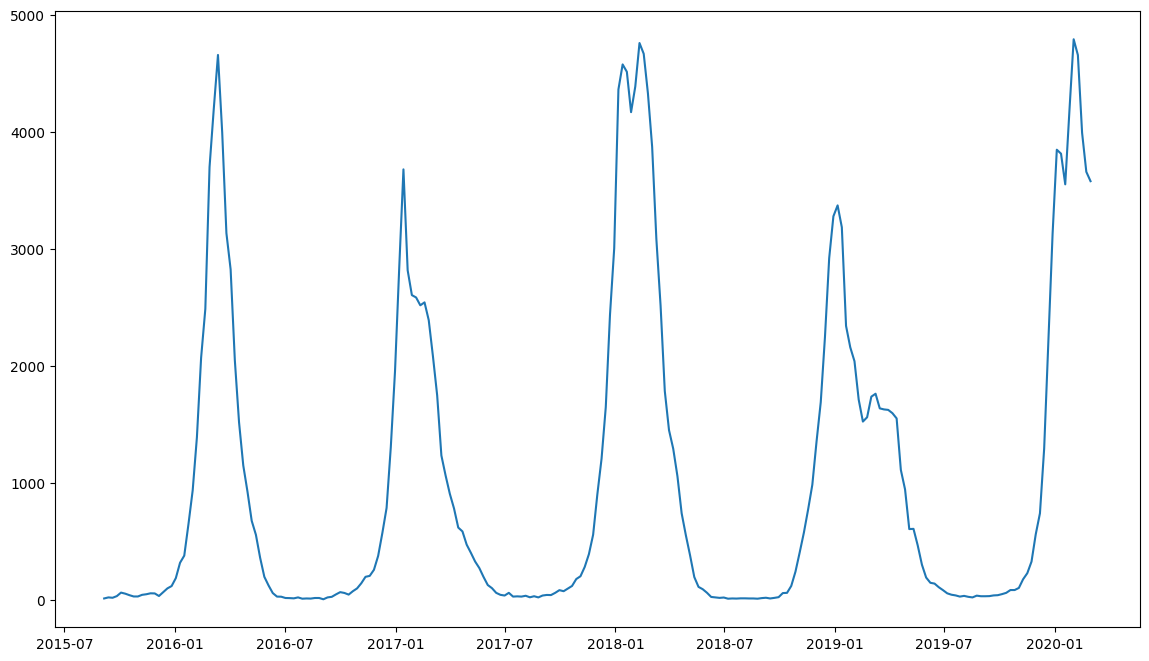

In [ ]:
plt.figure(figsize = (14,8))
plt.plot(wmt['ds'], wmt['y'])
plt.show()

In [ ]:
m = Prophet()

In [ ]:
m.fit(wmt)

21:40:03 - cmdstanpy - INFO - Chain [1] start processing
21:40:03 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

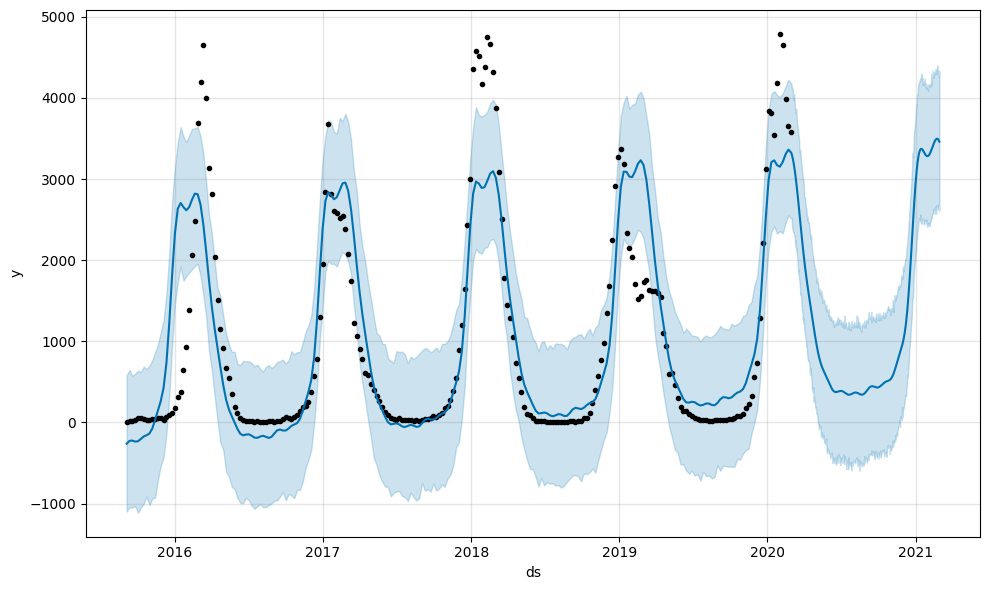

In [ ]:
fig1 = m.plot(forecast)

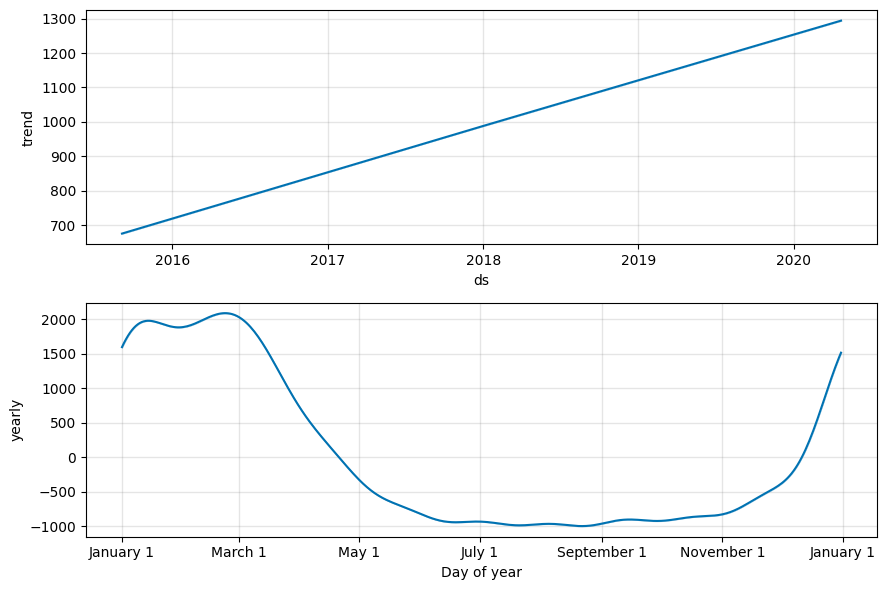

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import prophet
from prophet import Prophet

In [ ]:
df_flu.head()

,Surveillance Week,A(H1N1)pdm09,A(H3N2),A(Unsubtyped),Influenza B,Year,Total Cases,Epiweek,Week Ending
0,35,1.0,2.0,3.0,3.0,2015,9.0,201535,2015-09-05
1,36,2.0,11.0,5.0,0.0,2015,18.0,201536,2015-09-12
2,37,0.0,10.0,4.0,1.0,2015,15.0,201537,2015-09-19
3,38,0.0,16.0,13.0,0.0,2015,29.0,201538,2015-09-26
4,39,6.0,34.0,13.0,6.0,2015,59.0,201539,2015-10-03


In [ ]:
wmt = df_flu[['Week Ending', 'Total Cases']]
wmt.head()

,Week Ending,Total Cases
0,2015-09-05,9.0
1,2015-09-12,18.0
2,2015-09-19,15.0
3,2015-09-26,29.0
4,2015-10-03,59.0


In [ ]:
wmt.rename(columns={'Week Ending':'ds','Total Cases':'y'}, inplace=True)

In [ ]:
wmt['ds'] = pd.to_datetime(wmt['ds'])

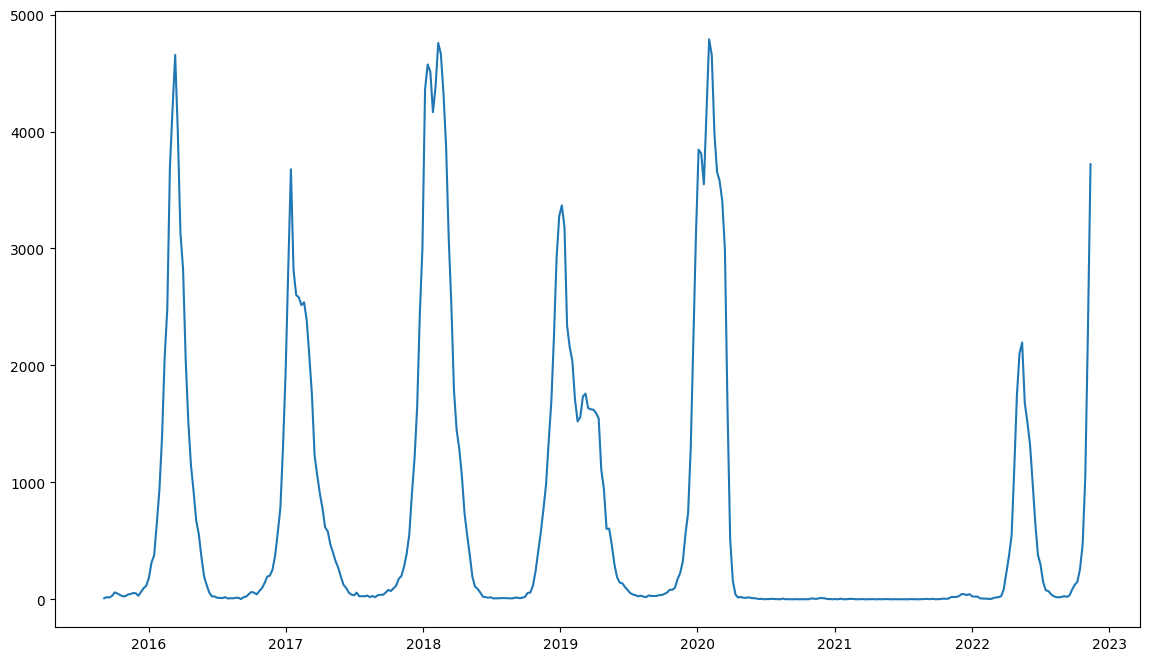

In [ ]:
plt.figure(figsize = (14,8))
plt.plot(wmt['ds'], wmt['y'])
plt.show()

In [ ]:
m = Prophet()

In [ ]:
m.fit(wmt)

21:47:22 - cmdstanpy - INFO - Chain [1] start processing
21:47:22 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

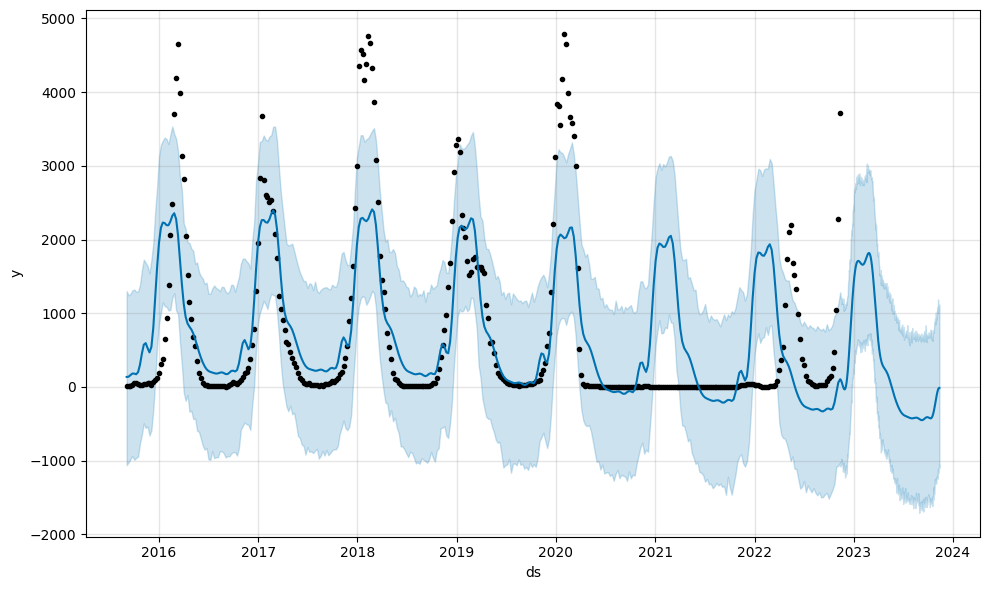

In [ ]:
fig1 = m.plot(forecast)

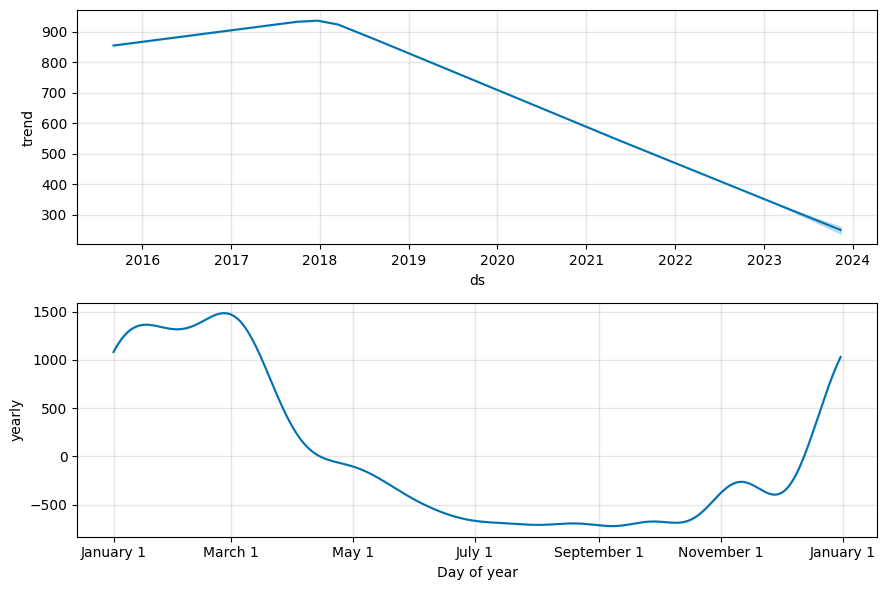

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
rolling = df_flu['Total Cases'].rolling(window=4)
rolling_mean = rolling.mean().dropna()
print(rolling_mean)

Week Ending
2015-09-26      17.75
2015-10-03      30.25
2015-10-10      38.25
2015-10-17      43.75
2015-10-24      43.00
               ...   
2022-10-15     153.75
2022-10-22     250.00
2022-10-29     479.00
2022-11-05    1011.50
2022-11-12    1877.00
Name: Total Cases, Length: 373, dtype: float64


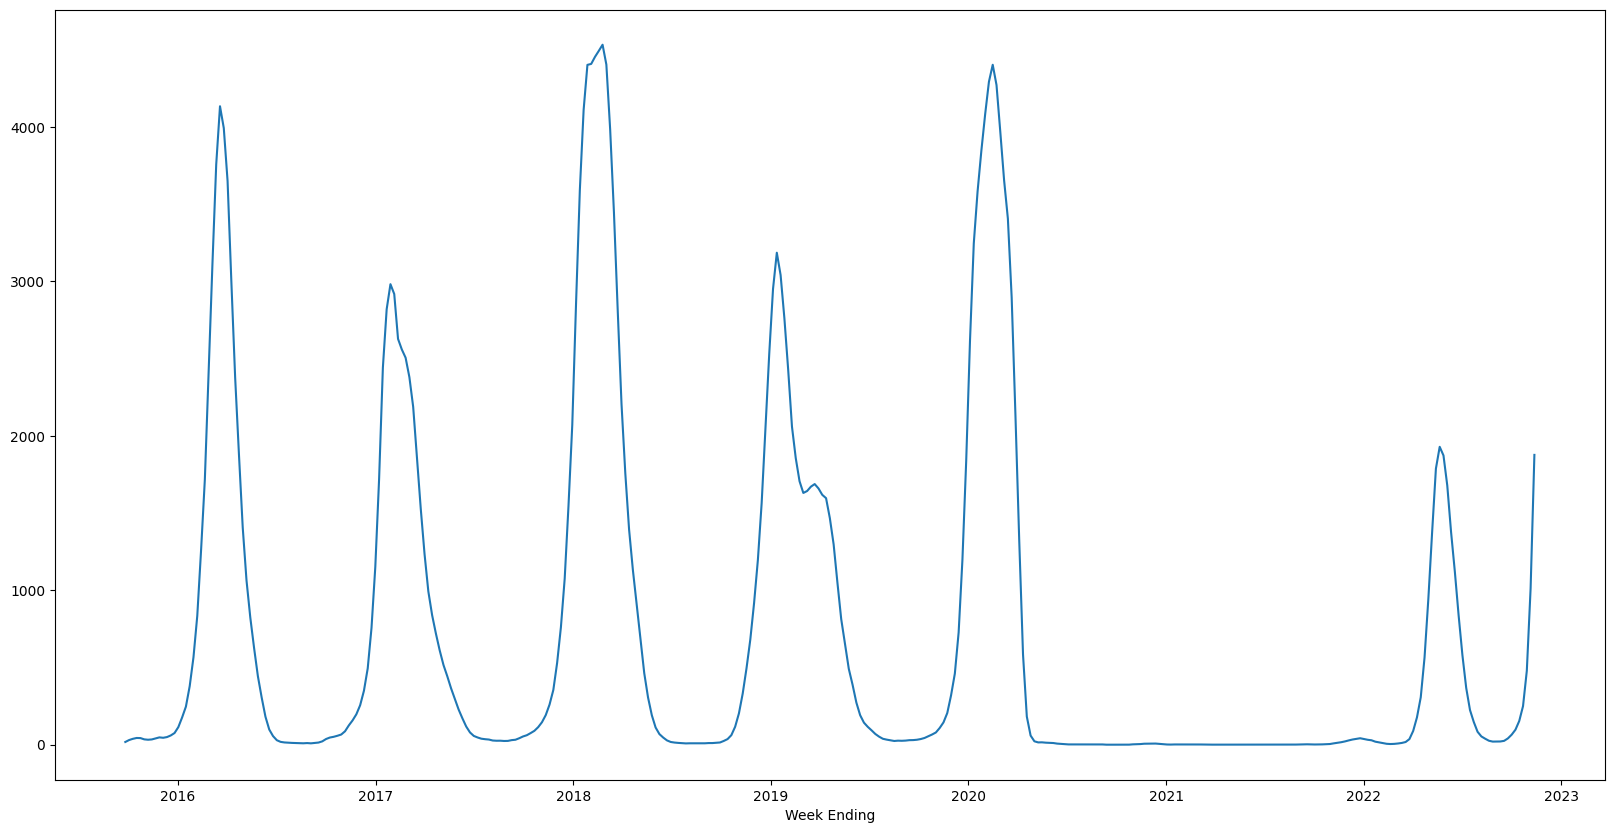

In [ ]:
rolling_mean.plot()
plt.show()

In [ ]:
rolling = df_flu['Total Cases'].rolling(window=4)
rolling_std = rolling.std().dropna()
print(rolling_std)

Week Ending
2015-09-26       8.381527
2015-10-03      20.089384
2015-10-10      19.956202
2015-10-17      13.351030
2015-10-24      14.491377
                 ...     
2022-10-15      75.256783
2022-10-22     156.718431
2022-10-29     396.712322
2022-11-05     907.196598
2022-11-12    1443.120462
Name: Total Cases, Length: 373, dtype: float64


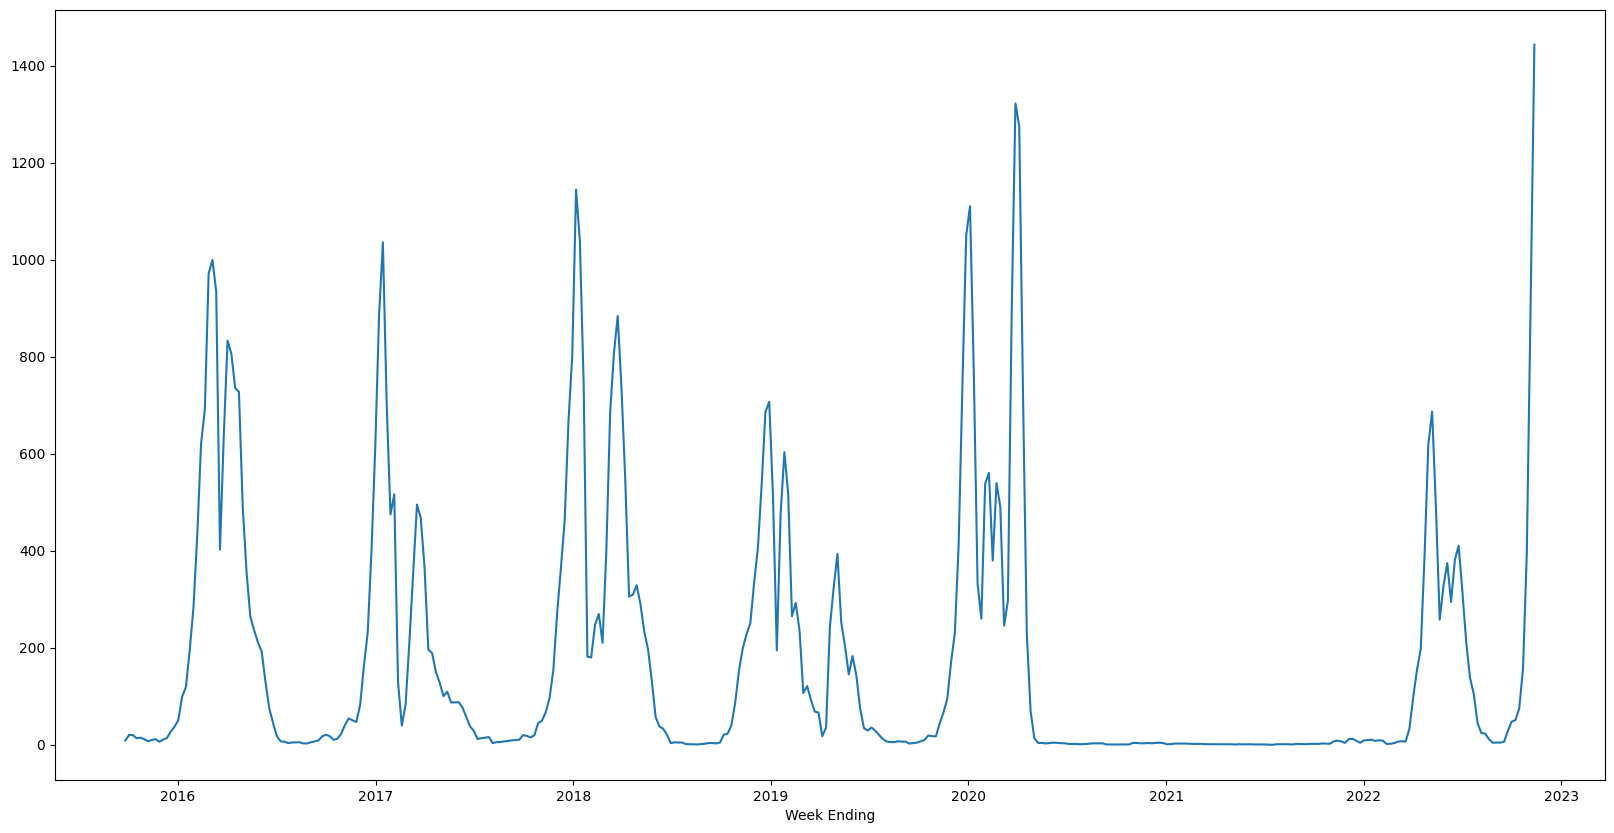

In [ ]:
rolling_std.plot()
plt.show()

In [ ]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters

In [ ]:
df_flu_pre_COVID.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235 entries, 2015-09-05 to 2020-02-29
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Total Cases  235 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


In [ ]:
def ADF_Stationarity_Test(timeseries, significance_level):
    from statsmodels.tsa.stattools import adfuller
    import pandas as pd
    timeseries = pd.DataFrame(timeseries)
    X = timeseries.values
    significance_level_trans = round(significance_level*100)
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
	    print('\t%s: %.3f' % (key, value))
    key = str(significance_level_trans)+'%'
    if result[0] <= result[4][key]:
        print('Based on a significance level of %s, this time series is stationary' % significance_level)
    else:
        print('Based on a significance level of %s, this time series is non-stationary' % significance_level)

In [ ]:
ADF_Stationarity_Test(timeseries=df_flu_pre_COVID, significance_level=0.05)

ADF Statistic: -4.008630
p-value: 0.001366
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574
Based on a significance level of 0.05, this time series is stationary


In [ ]:
d = 0

In [ ]:
from statsmodels.tsa.stattools import pacf
pacf(df_flu_pre_COVID)

array([ 1.        ,  0.97020525, -0.5910531 , -0.17856183, -0.11669712,
       -0.05384971, -0.03644637,  0.0285333 , -0.15331433, -0.00946545,
        0.10540962, -0.00564435, -0.00837434, -0.11837565, -0.14051683,
       -0.03727803, -0.04376063, -0.05661477, -0.03624588, -0.06960944,
       -0.06441512,  0.0028184 , -0.06464248, -0.06857709])

In [ ]:
p = 3

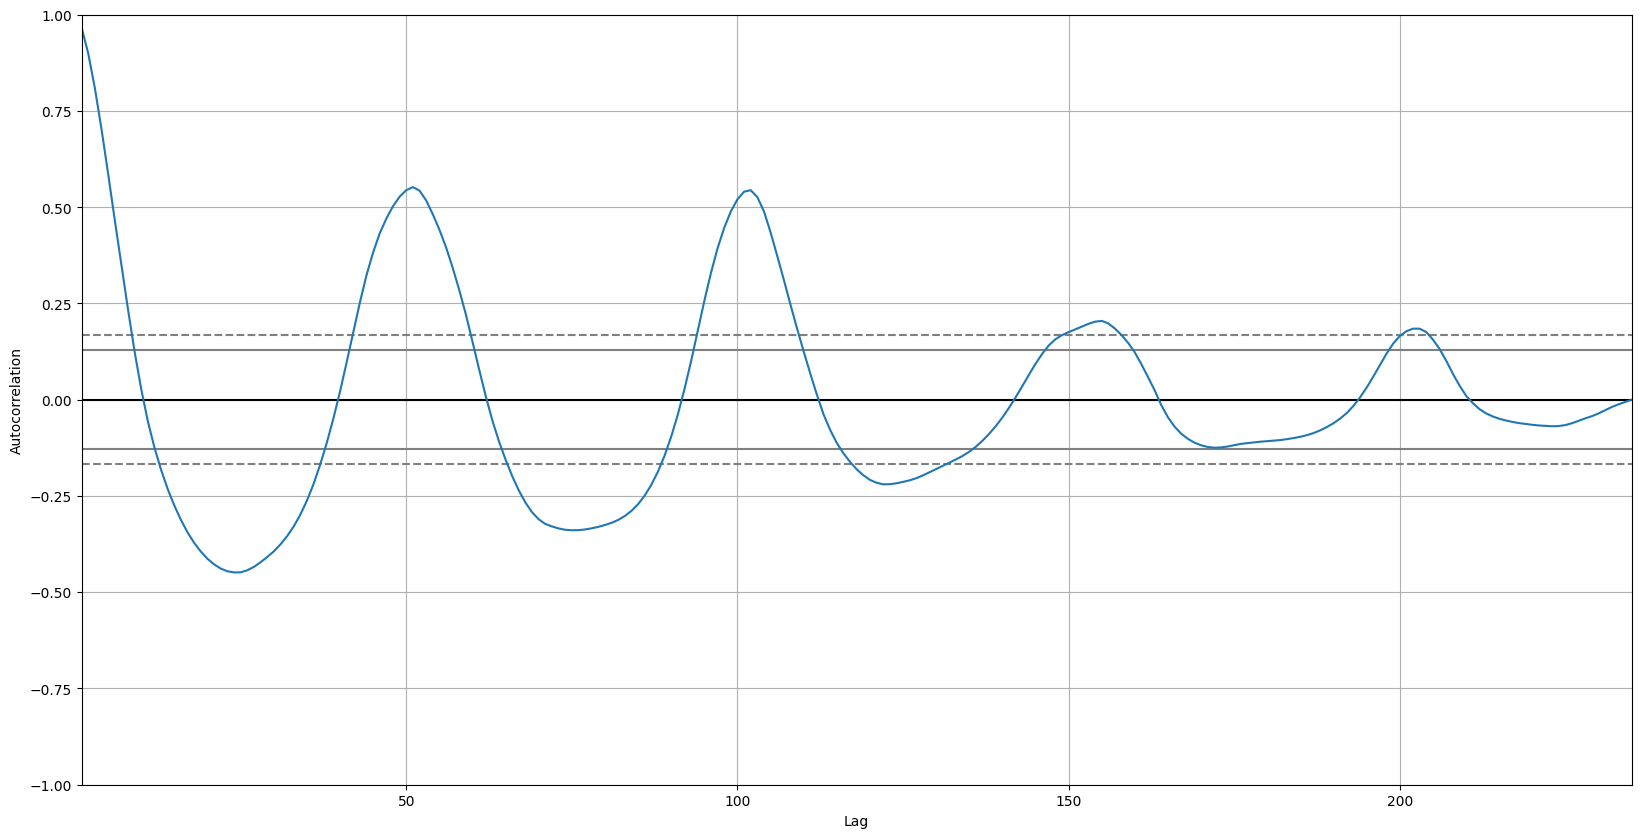

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_flu_pre_COVID)
plt.show()

In [ ]:
q = 5

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:            Total Cases   No. Observations:                  235
Model:                 ARIMA(3, 0, 5)   Log Likelihood               -1597.925
Date:                Tue, 22 Nov 2022   AIC                           3215.849
Time:                        17:54:06   BIC                           3250.445
Sample:                    09-05-2015   HQIC                          3229.797
                         - 02-29-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1009.9312    105.783      9.547      0.000     802.601    1217.261
ar.L1          1.5341      0.564      2.722      0.006       0.430       2.639
ar.L2         -0.1641      1.088     -0.151      0.8

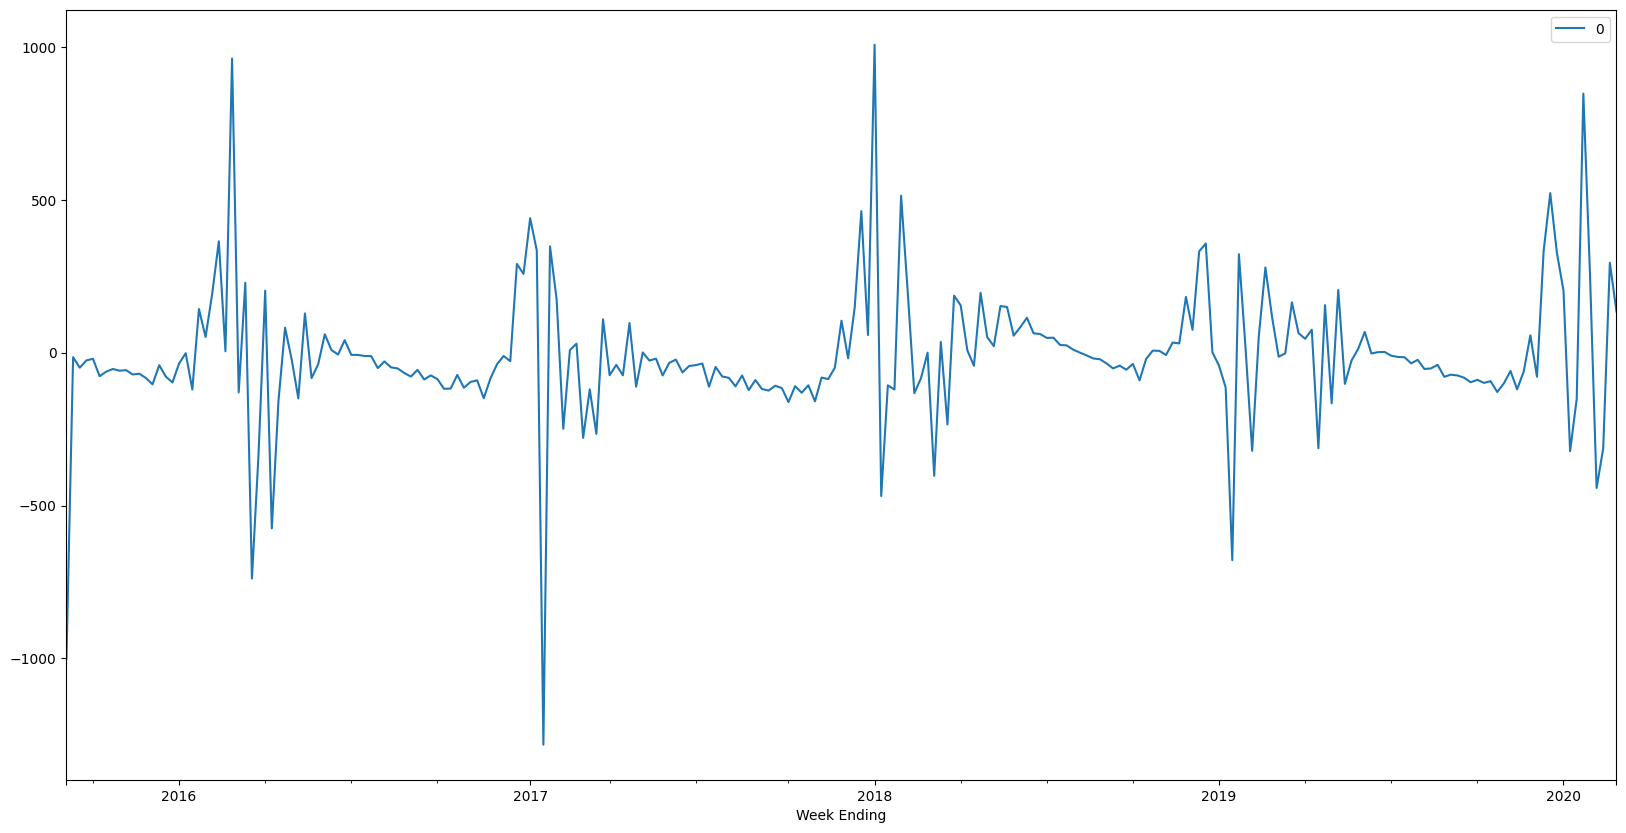

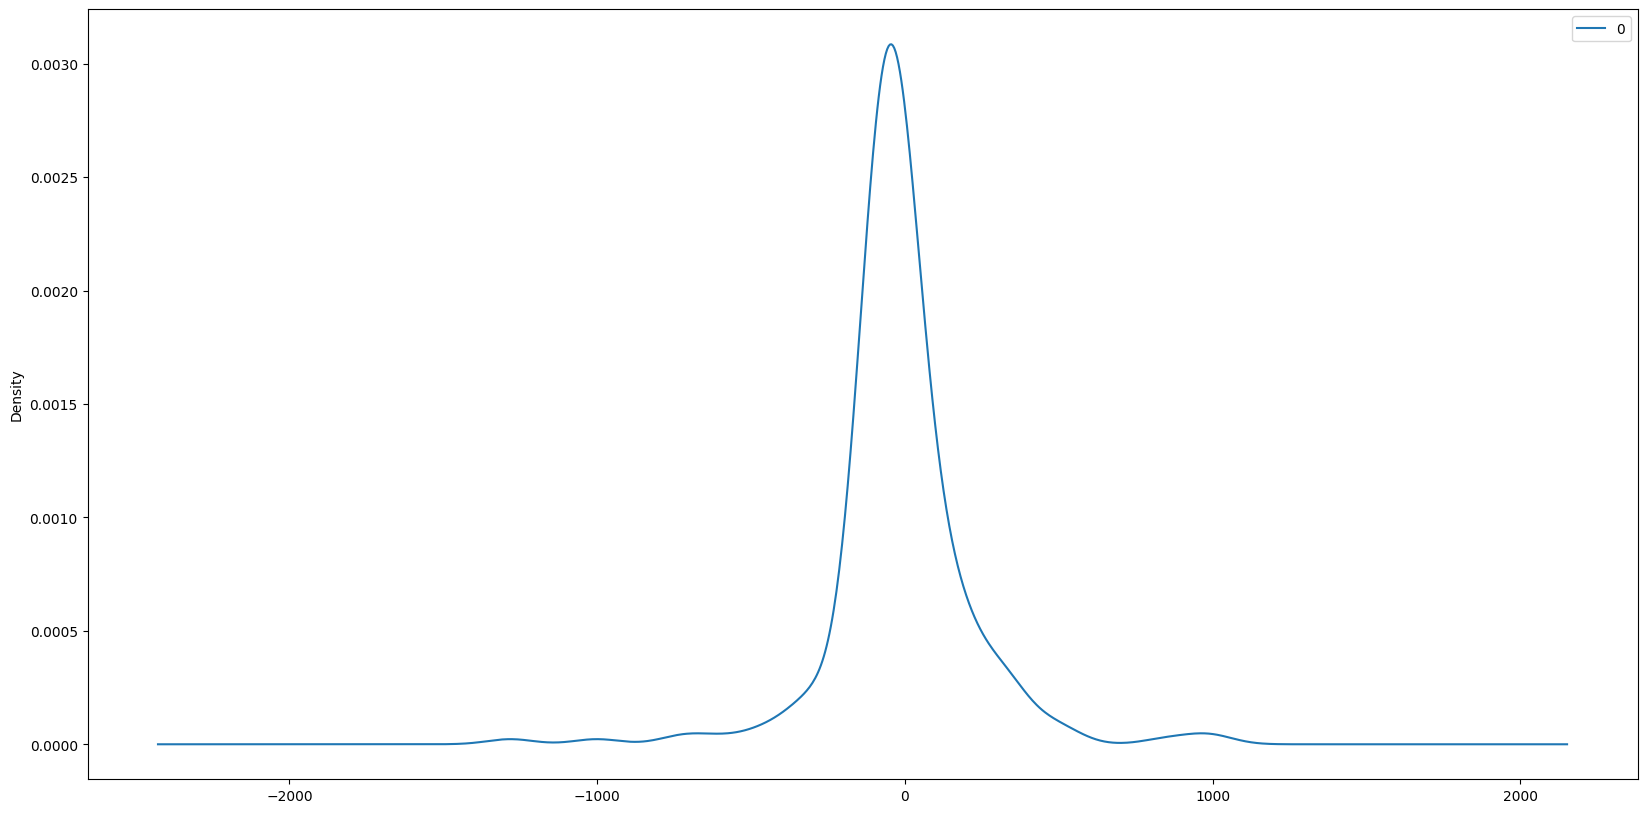

                 0
count   235.000000
mean    -13.592953
std     224.356346
min   -1282.134820
25%     -88.155758
50%     -34.765989
75%      50.160231
max    1007.335018


In [ ]:
X = df_flu_pre_COVID
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train['Total Cases']]
predictions = list()

# fit model
model = ARIMA(df_flu_pre_COVID, order=(p,d,q))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
train

,Total Cases
Week Ending,
2015-09-05,9.0
2015-09-12,18.0
2015-09-19,15.0
2015-09-26,29.0
2015-10-03,59.0
...,...
2018-07-21,8.0
2018-07-28,10.0
2018-08-04,10.0


In [ ]:
test

,Total Cases
Week Ending,
2018-08-25,7.0
2018-09-01,12.0
2018-09-08,15.0
2018-09-15,9.0
2018-09-22,14.0
...,...
2020-02-01,4789.0
2020-02-08,4654.0
2020-02-15,3989.0


In [ ]:
history

[9.0,
 18.0,
 15.0,
 29.0,
 59.0,
 50.0,
 37.0,
 26.0,
 26.0,
 40.0,
 45.0,
 53.0,
 52.0,
 30.0,
 63.0,
 95.0,
 115.0,
 183.0,
 314.0,
 375.0,
 645.0,
 933.0,
 1386.0,
 2067.0,
 2484.0,
 3697.0,
 4193.0,
 4655.0,
 3994.0,
 3132.0,
 2822.0,
 2045.0,
 1514.0,
 1146.0,
 922.0,
 673.0,
 553.0,
 357.0,
 194.0,
 120.0,
 55.0,
 25.0,
 24.0,
 13.0,
 12.0,
 10.0,
 18.0,
 7.0,
 9.0,
 8.0,
 13.0,
 13.0,
 2.0,
 18.0,
 23.0,
 44.0,
 63.0,
 56.0,
 42.0,
 71.0,
 95.0,
 139.0,
 194.0,
 202.0,
 254.0,
 373.0,
 569.0,
 783.0,
 1303.0,
 1952.0,
 2837.0,
 3677.0,
 2814.0,
 2602.0,
 2582.0,
 2515.0,
 2540.0,
 2388.0,
 2078.0,
 1745.0,
 1231.0,
 1060.0,
 904.0,
 778.0,
 615.0,
 582.0,
 469.0,
 399.0,
 325.0,
 269.0,
 193.0,
 124.0,
 97.0,
 57.0,
 40.0,
 34.0,
 57.0,
 25.0,
 27.0,
 25.0,
 32.0,
 19.0,
 28.0,
 18.0,
 34.0,
 39.0,
 38.0,
 57.0,
 80.0,
 71.0,
 93.0,
 116.0,
 175.0,
 199.0,
 278.0,
 388.0,
 554.0,
 899.0,
 1204.0,
 1645.0,
 2434.0,
 3002.0,
 4360.0,
 4574.0,
 4511.0,
 4166.0,
 4385.0,
 4757.0,
 

In [ ]:
model = ARIMA(df_flu_pre_COVID, order=(p,d,q))
model_fit = model.fit()
output = model_fit.forecast(steps=len(test))
output

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2020-03-07    3458.329213
2020-03-14    3173.094729
2020-03-21    2775.420426
2020-03-28    2386.558783
2020-04-04    1987.096515
                 ...     
2021-08-14     751.212301
2021-08-21     852.714276
2021-08-28     953.129410
2021-09-04    1050.734663
2021-09-11    1143.921705
Freq: W-SAT, Name: predicted_mean, Length: 80, dtype: float64

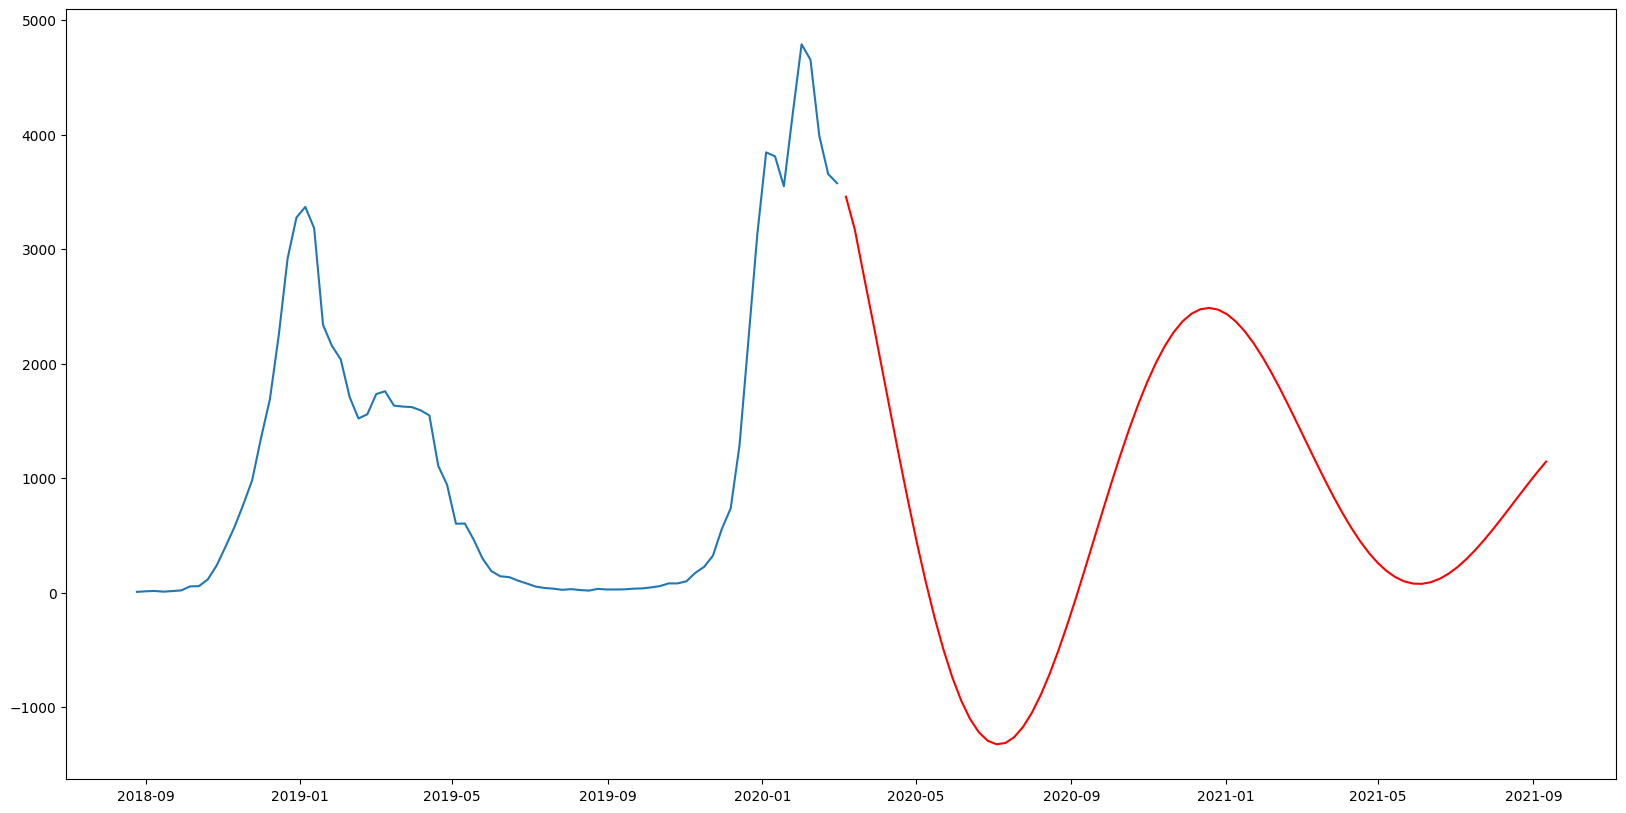

In [ ]:
plt.plot(test)
plt.plot(output, color='red')
plt.show()

In [ ]:
len(history)

235

In [ ]:
len(predictions)

80

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-6.574116, expected=7.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-9.991966, expected=12.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3.307598, expected=15.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9.938243, expected=9.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=41.438061, expected=14.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=19.434492, expected=20.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=37.976880, expected=55.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=112.052244, expected=57.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.113235, expected=116.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=176.077155, expected=238.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=357.666512, expected=402.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=548.107027, expected=572.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=702.646931, expected=769.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=912.132689, expected=981.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1133.602051, expected=1350.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1574.126355, expected=1687.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1895.089420, expected=2245.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2529.176916, expected=2918.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3274.016471, expected=3276.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3440.967983, expected=3369.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3280.944810, expected=3182.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2978.465191, expected=2339.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1795.695180, expected=2156.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1898.980976, expected=2037.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2010.025810, expected=1709.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1500.534863, expected=1521.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1229.680284, expected=1558.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1513.306559, expected=1734.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1792.853582, expected=1759.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1666.267864, expected=1634.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1432.867991, expected=1625.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1514.931839, expected=1621.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1548.269876, expected=1593.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1473.219132, expected=1548.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1413.220934, expected=1108.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=799.872282, expected=941.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=742.657594, expected=602.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=392.804091, expected=604.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=555.156571, expected=463.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=347.440644, expected=298.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=169.280280, expected=188.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.604862, expected=143.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=127.273735, expected=136.000000
predicted=115.721516, expected=105.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=81.257529, expected=80.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.295913, expected=53.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.930055, expected=41.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.247620, expected=35.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.678886, expected=25.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.802789, expected=31.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.945889, expected=23.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.997452, expected=18.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.163415, expected=33.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=91.226825, expected=28.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=86.761215, expected=28.000000
predicted=85.177708, expected=29.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.373817, expected=35.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=108.751966, expected=37.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=110.320062, expected=46.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=125.423783, expected=57.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=145.406916, expected=81.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=175.467647, expected=81.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=165.329549, expected=99.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=191.850849, expected=173.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=297.446473, expected=225.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=346.113851, expected=324.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=452.063590, expected=557.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=759.958479, expected=737.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=922.383860, expected=1290.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1622.040431, expected=2206.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2763.487171, expected=3126.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3667.280446, expected=3845.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=4171.138977, expected=3811.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3667.517523, expected=3549.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3255.449493, expected=4182.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=4469.517176, expected=4789.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5146.518996, expected=4654.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=4312.427964, expected=3989.000000
predicted=3312.915937, expected=3656.000000
predicted=3427.278802, expected=3576.000000
Test RMSE: 215.812


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


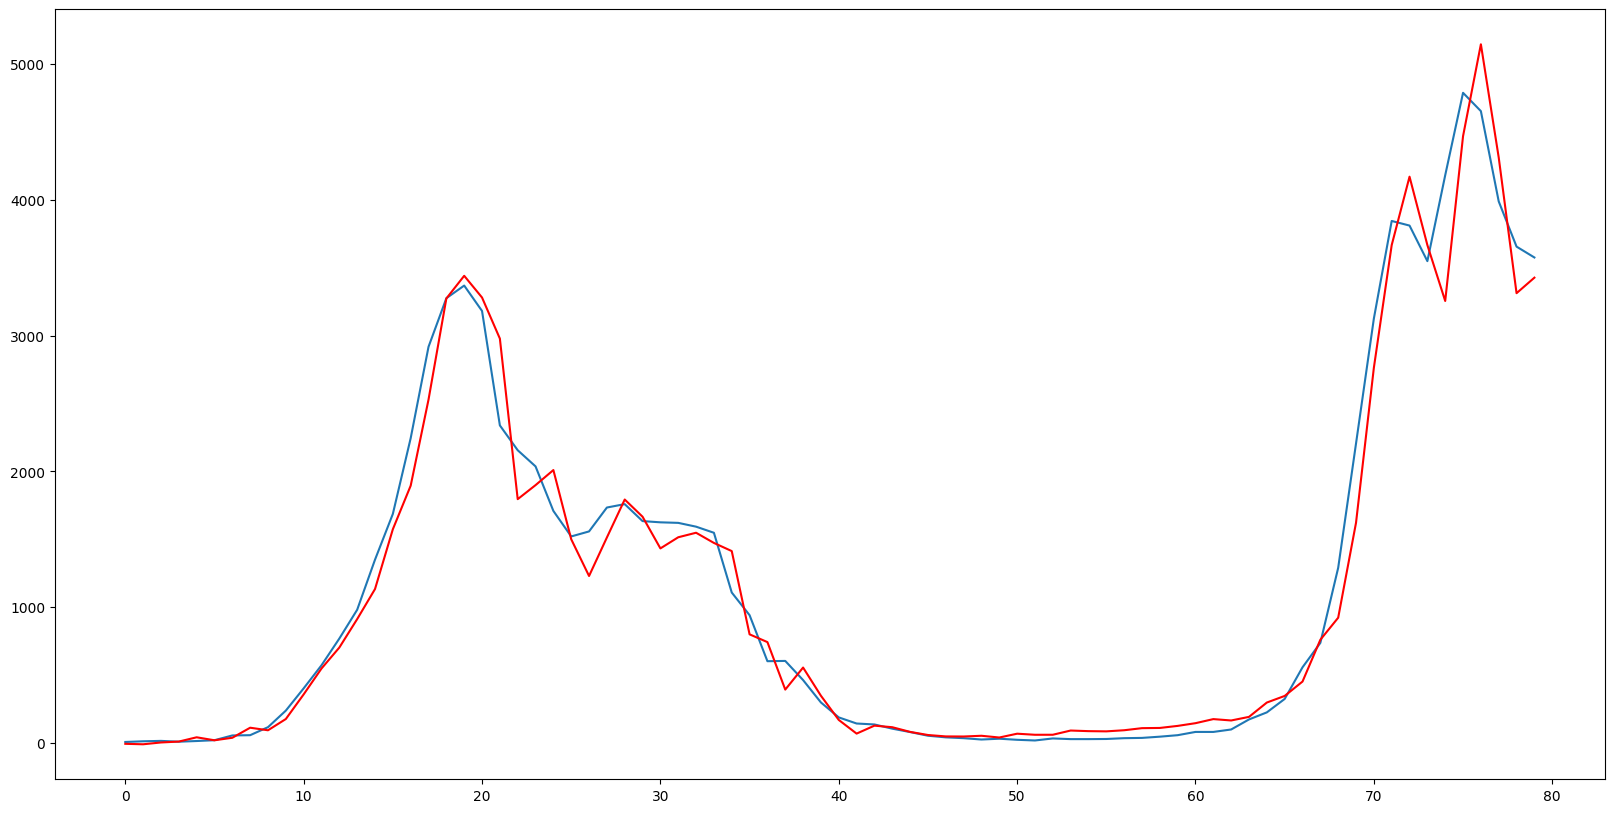

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(p,d,q))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test['Total Cases'][t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
plt.plot(test.values)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
! pip install chart_studio

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 64.4/64.4 kB 266.9 kB/s eta 0:00:00


In [ ]:
! pip install cufflinks

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 81.7/81.7 kB 99.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68718 sha256=bc756893ece24d77aad79d15ce1dc7656a34b11b75e60c66977918e1c0068cfd
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\32\f7\bd\3b5f431b9a740489de249dad87142f8ee000b7c6b6e8e58d54
Successfully built cufflinks


In [ ]:
import chart_studio.plotly as ply
import cufflinks as cf
df_flu.iplot(title="Canadian Influenza Cases")


KeyboardInterrupt



# Exponential Smoothing - pre-COVID

https://towardsdatascience.com/a-blueprint-for-time-series-9f865609bfa2

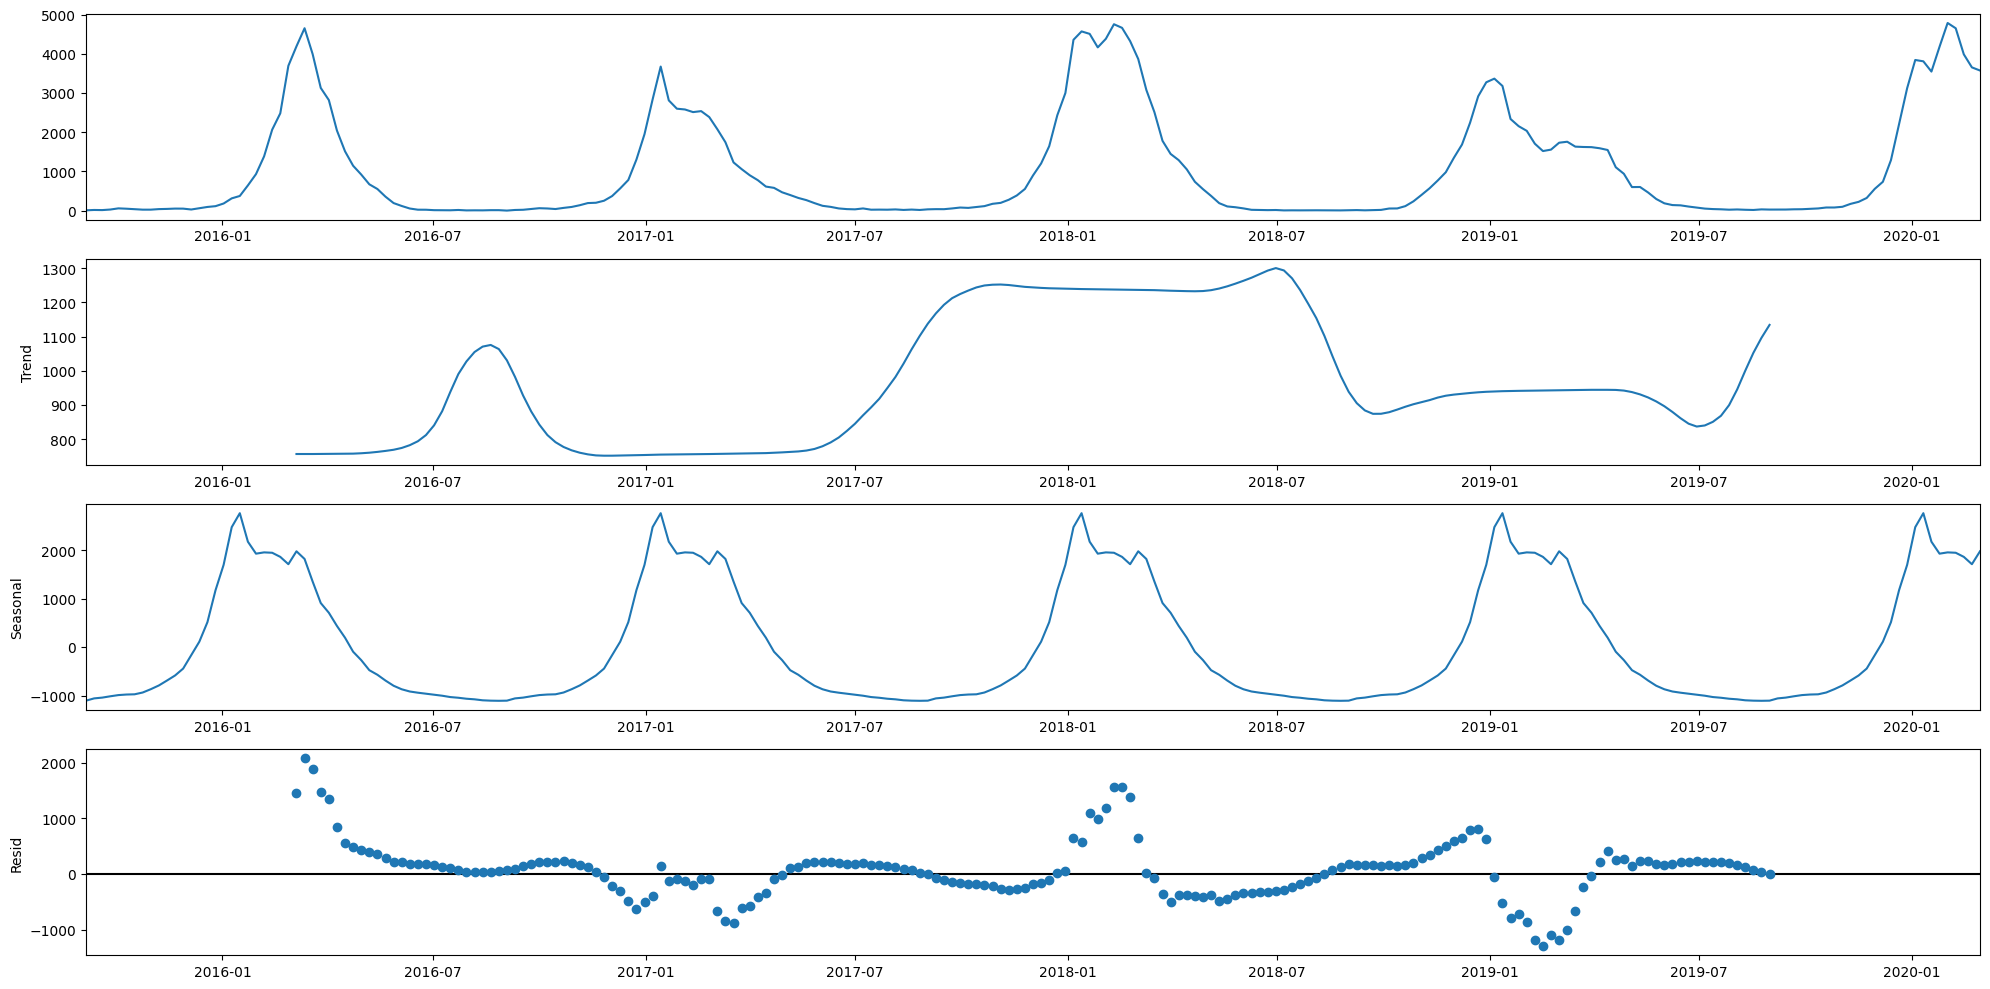

In [ ]:
#We will use statsmodels seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

#fit the model
decomposition = seasonal_decompose(df_flu_pre_COVID)

#to extract components 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

#to directly plot the components
result = seasonal_decompose(df_flu_pre_COVID)
result.plot()
plt.show()

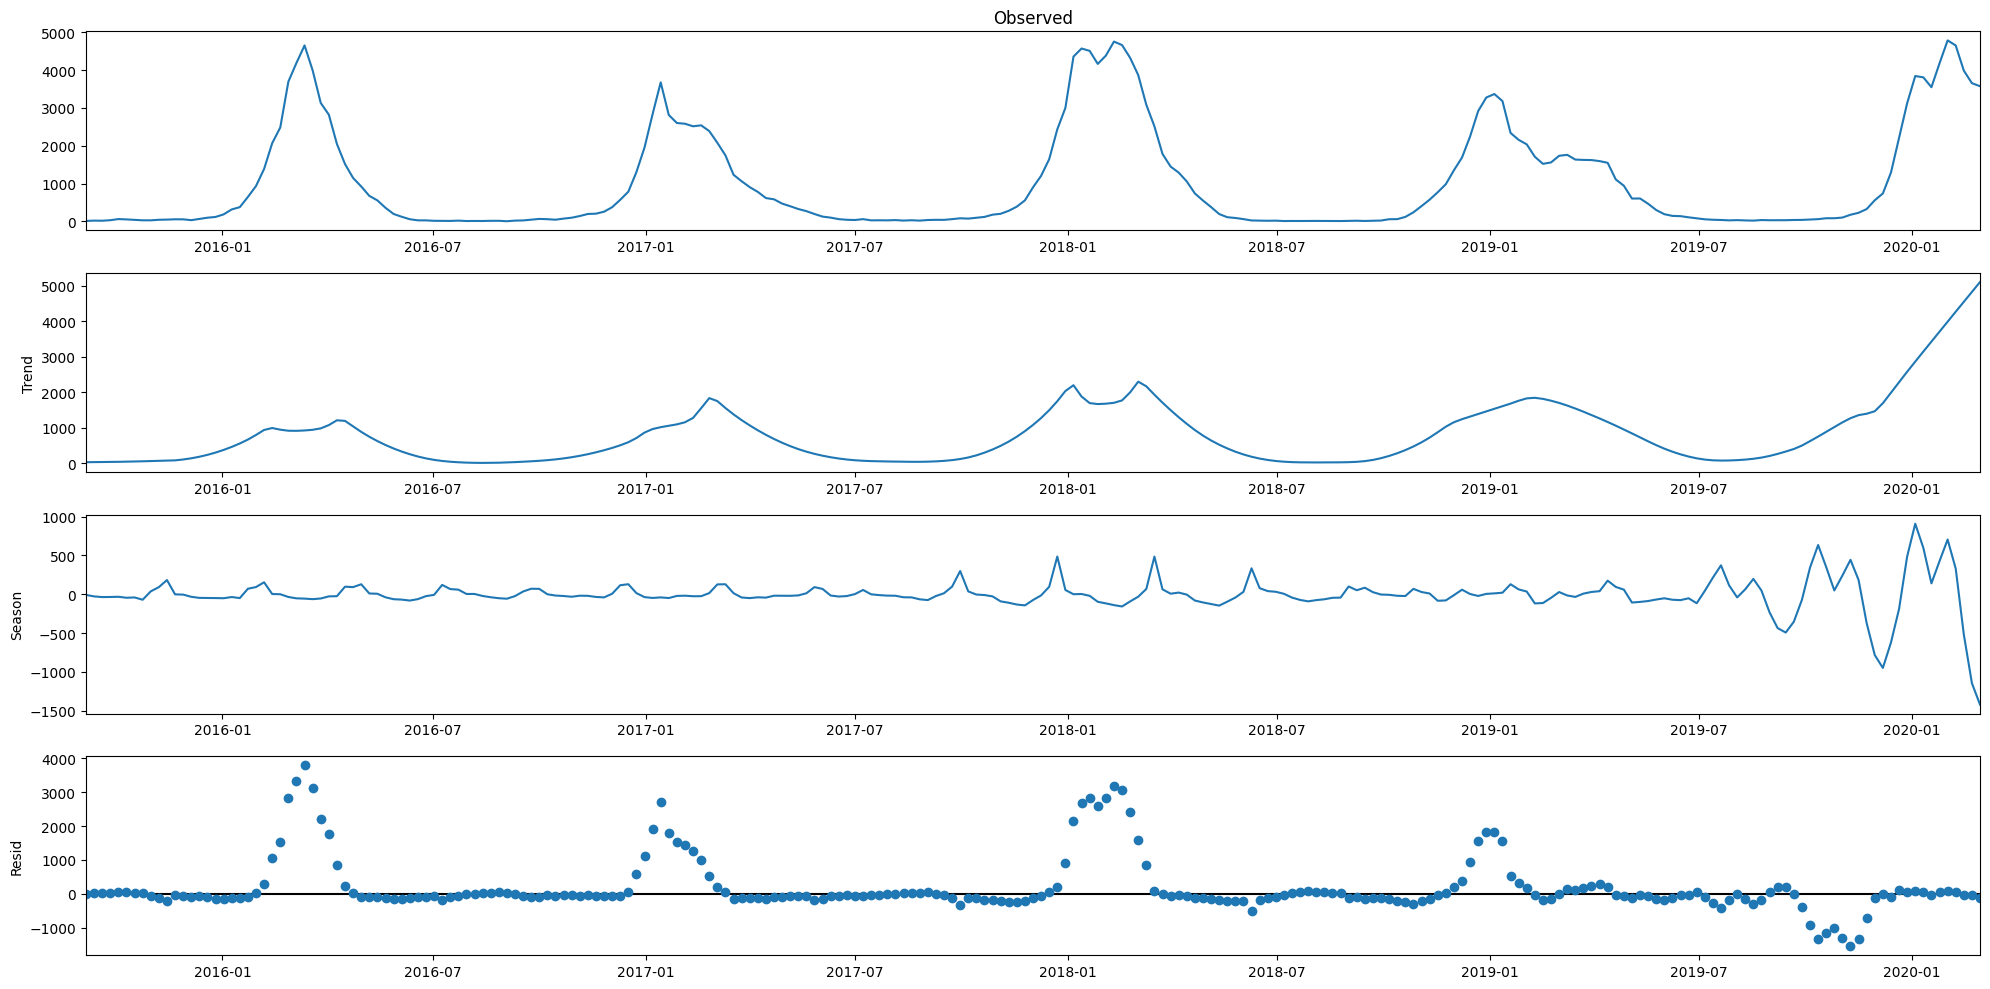

In [ ]:
from statsmodels.tsa.seasonal import STL
stl = STL(df_flu_pre_COVID, period=12, robust=True)
res_robust = stl.fit()
fig = res_robust.plot()

In [ ]:
df_flu_pre_COVID_month = df_flu_pre_COVID.resample('M').mean()

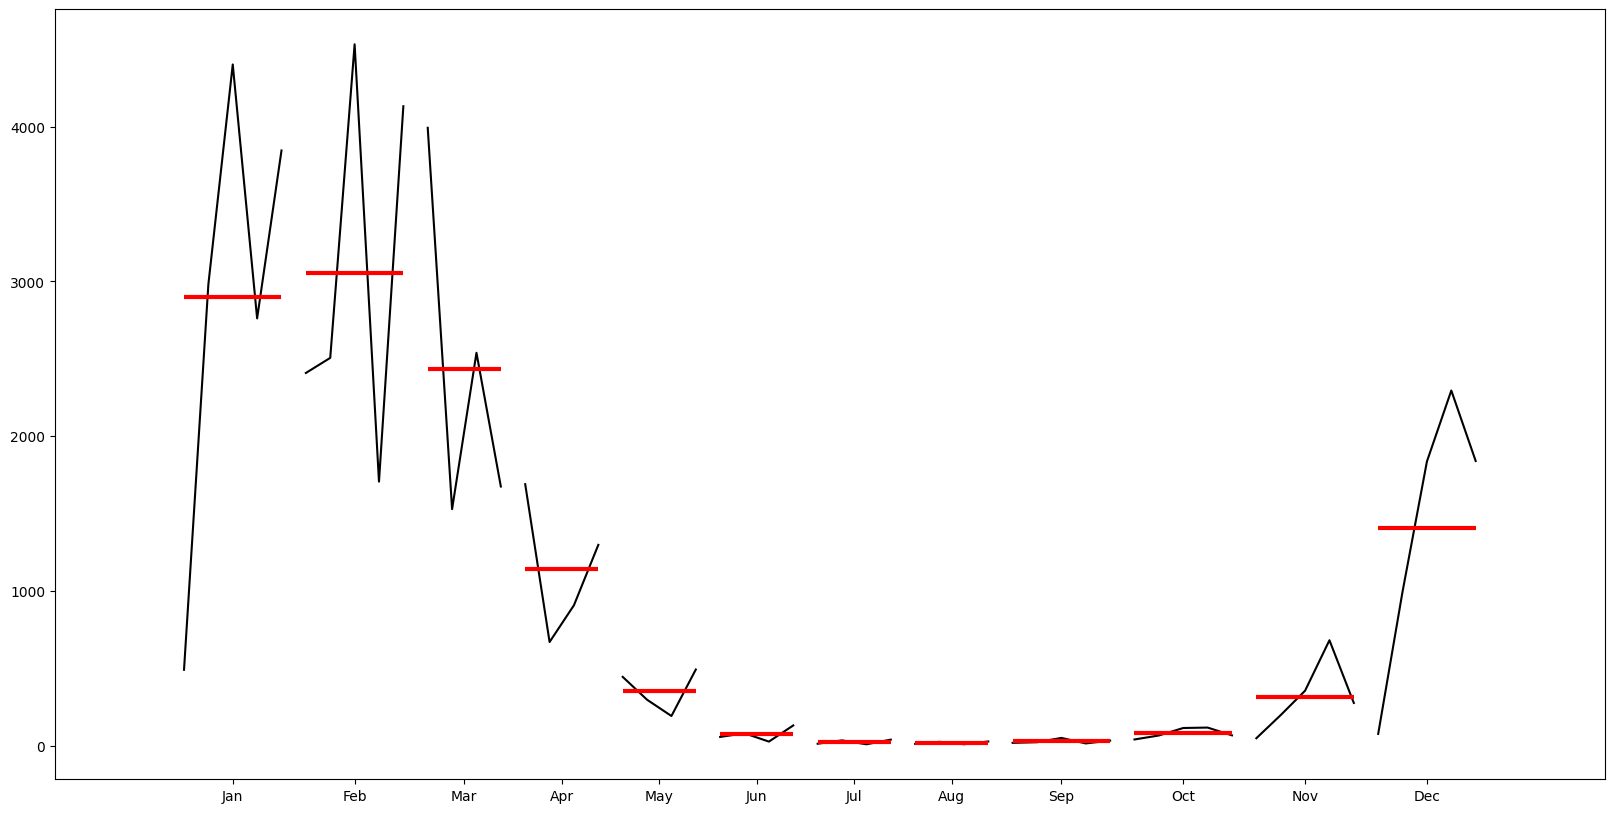

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import month_plot

month_plot(df_flu_pre_COVID_month)
plt.show()

In [ ]:
import plotly.express as px

from statsmodels.tsa.api import SimpleExpSmoothing
#Split to train and test
X = df_flu_pre_COVID
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
y_hat_avg = test.copy()

#fit the model
fit2 = SimpleExpSmoothing(np.asarray(train['Total Cases'])).fit(smoothing_level=0.8,optimized=False)

#forecast
y_hat_avg['SES Predicted Cases'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))

#Append train, test and forecast results
train['Name'] ='Train'
test['Name'] = 'Test'
x = pd.concat([train, test])
y = pd.DataFrame(y_hat_avg['SES Predicted Cases'])
y['Name'] = 'SES Predicted Cases'
y.rename(columns ={'SES Predicted Cases':'Total Cases'}, inplace = True )
z = pd.concat([x, y])
fig = px.line(z, x=z.index, y="Total Cases", color='Name')
fig.show()

#calculate root mean squared error
rms = sqrt(mean_squared_error(test['Total Cases'], y_hat_avg['SES Predicted Cases']))
print(rms)

1797.3189586801493


<Figure size 1600x800 with 0 Axes>

In [ ]:
from statsmodels.tsa.api import Holt

#Split into train and test
X = df_flu_pre_COVID
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
y_hat_avg = test.copy()

#fit the model
fit2 = Holt(np.asarray(train['Total Cases'])).fit(smoothing_level = 0.8,smoothing_trend = 0.6)

#forecast
y_hat_avg['Holt Predicted Cases'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))

#Appending data - train,test and forecast results for visualization
train['Name'] ='Train'
test['Name'] = 'Test'
x = pd.concat([train, test])
y = pd.DataFrame(y_hat_avg['Holt Predicted Cases'])
y['Name'] = 'Holt Predicted Cases'
y.rename(columns ={'Holt Predicted Cases':'Total Cases'}, inplace = True )
z= x.append(y)
fig = px.line(z, x=z.index, y='Total Cases', color='Name')
fig.show()

#Check accuracy
rms = sqrt(mean_squared_error(test['Total Cases'], y_hat_avg['Holt Predicted Cases']))
print(rms)

C:\Users\User\AppData\Local\Temp\ipykernel_12692\3962624229.py:23: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1804.7045365358786


<Figure size 1600x800 with 0 Axes>

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
#Split to train and test
X = df_flu_pre_COVID
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
y_hat_avg = test.copy()

#Fit the model
fit2 = ExponentialSmoothing(np.asarray(train['Total Cases']),trend='add', seasonal=None, damped_trend=True).fit()

#Forecast
y_hat_avg['Holtd Predicted Cases'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))

#Append data for visualization
train['Name'] ='Train'
test['Name'] = 'Test'
x = pd.concat([train, test])
y = pd.DataFrame(y_hat_avg['Holtd Predicted Cases'])
y['Name'] = 'Holtd Predicted Cases'
y.rename(columns ={'Holtd Predicted Cases':'Total Cases'}, inplace = True )
z = pd.concat([x,y])
fig = px.line(z, x=z.index, y='Total Cases', color='Name')
fig.show()

#Check accuracy score
rms = sqrt(mean_squared_error(test['Total Cases'], y_hat_avg['Holtd Predicted Cases']))
print(rms)

1797.3431131069015


<Figure size 1600x800 with 0 Axes>

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

#Split our data into train and test
X = df_flu_pre_COVID
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
y_hat_avg = test.copy()

#Fit the model
fit2 = ExponentialSmoothing(np.asarray(train['Total Cases']),trend='add', seasonal='add', seasonal_periods=12,damped_trend=False).fit()

#Forecast
y_hat_avg['HoltWinter Predicted Cases'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))

#Append train, test and forecast for visualization
train['Name'] ='Train'
test['Name'] = 'Test'
x = pd.concat([train, test])
y = pd.DataFrame(y_hat_avg['HoltWinter Predicted Cases'])
y['Name'] = 'HoltWinter Predicted Cases'
y.rename(columns ={'HoltWinter Predicted Cases':'Total Cases'}, inplace = True )
z = pd.concat([x,y])
fig = px.line(z, x=z.index, y='Total Cases', color='Name')
fig.show()

#Check accuracy
rms = sqrt(mean_squared_error(test['Total Cases'], y_hat_avg['HoltWinter Predicted Cases']))
print(rms)

2894.520323410832


<Figure size 1600x800 with 0 Axes>

# ARIMA - pre-COVID

In [ ]:
from statsmodels.tsa.stattools import adfuller

#Dickey-Fuller test:
def test_stationarity(x):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(x, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#test for superstore
test_stationarity(df_flu_pre_COVID)

Results of Dickey-Fuller Test:
Test Statistic                  -4.008630
p-value                          0.001366
#Lags Used                       6.000000
Number of Observations Used    228.000000
Critical Value (1%)             -3.459361
Critical Value (5%)             -2.874302
Critical Value (10%)            -2.573571
dtype: float64


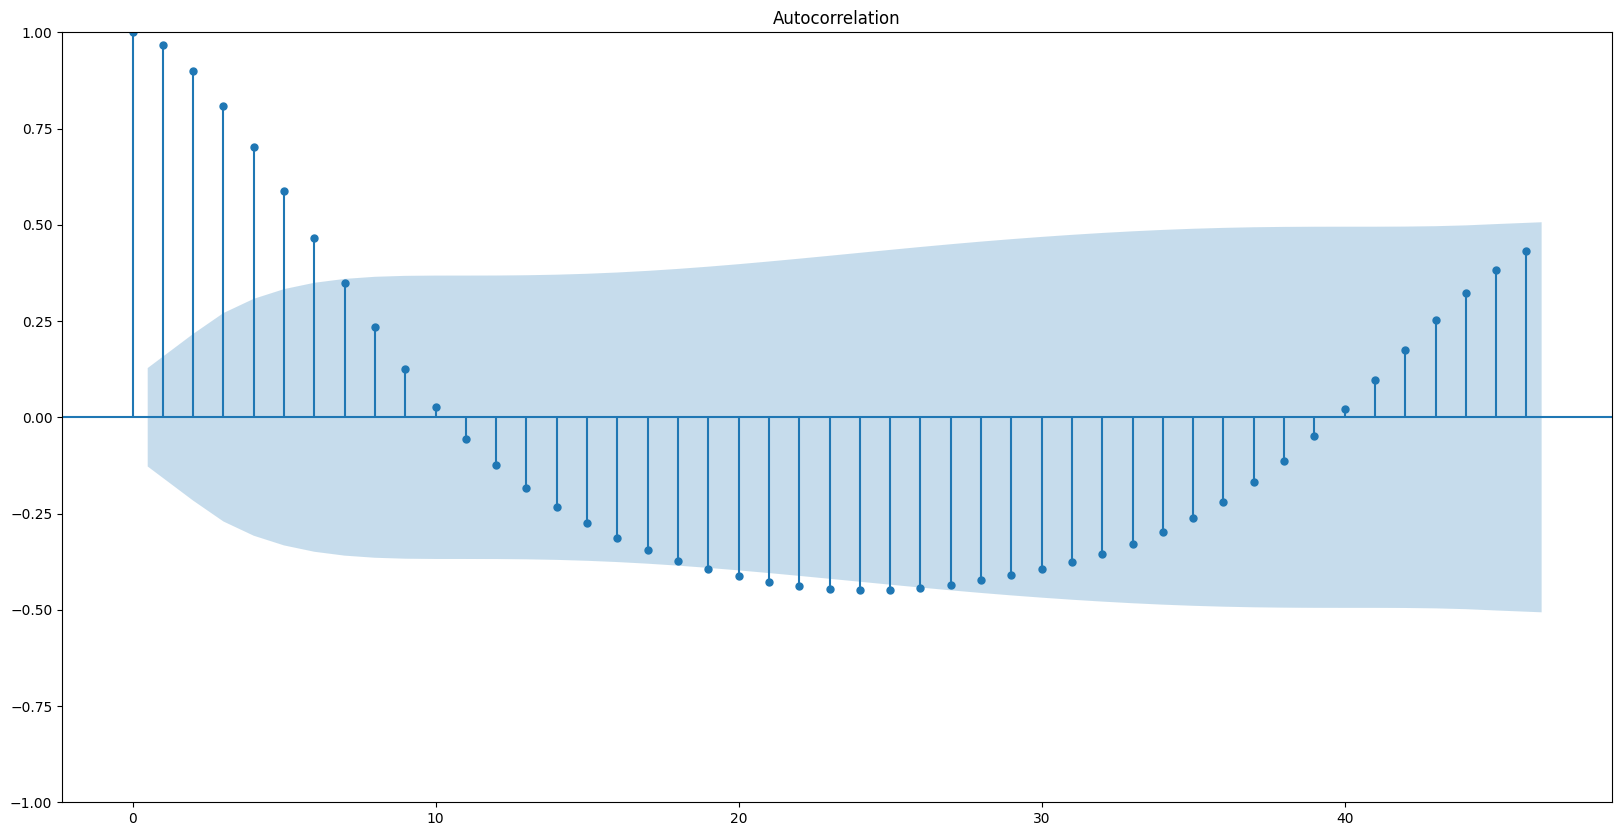

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

#plot acf and specify the number of lags
sm.graphics.tsa.plot_acf(df_flu_pre_COVID.squeeze(), lags=46)
plt.show()

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



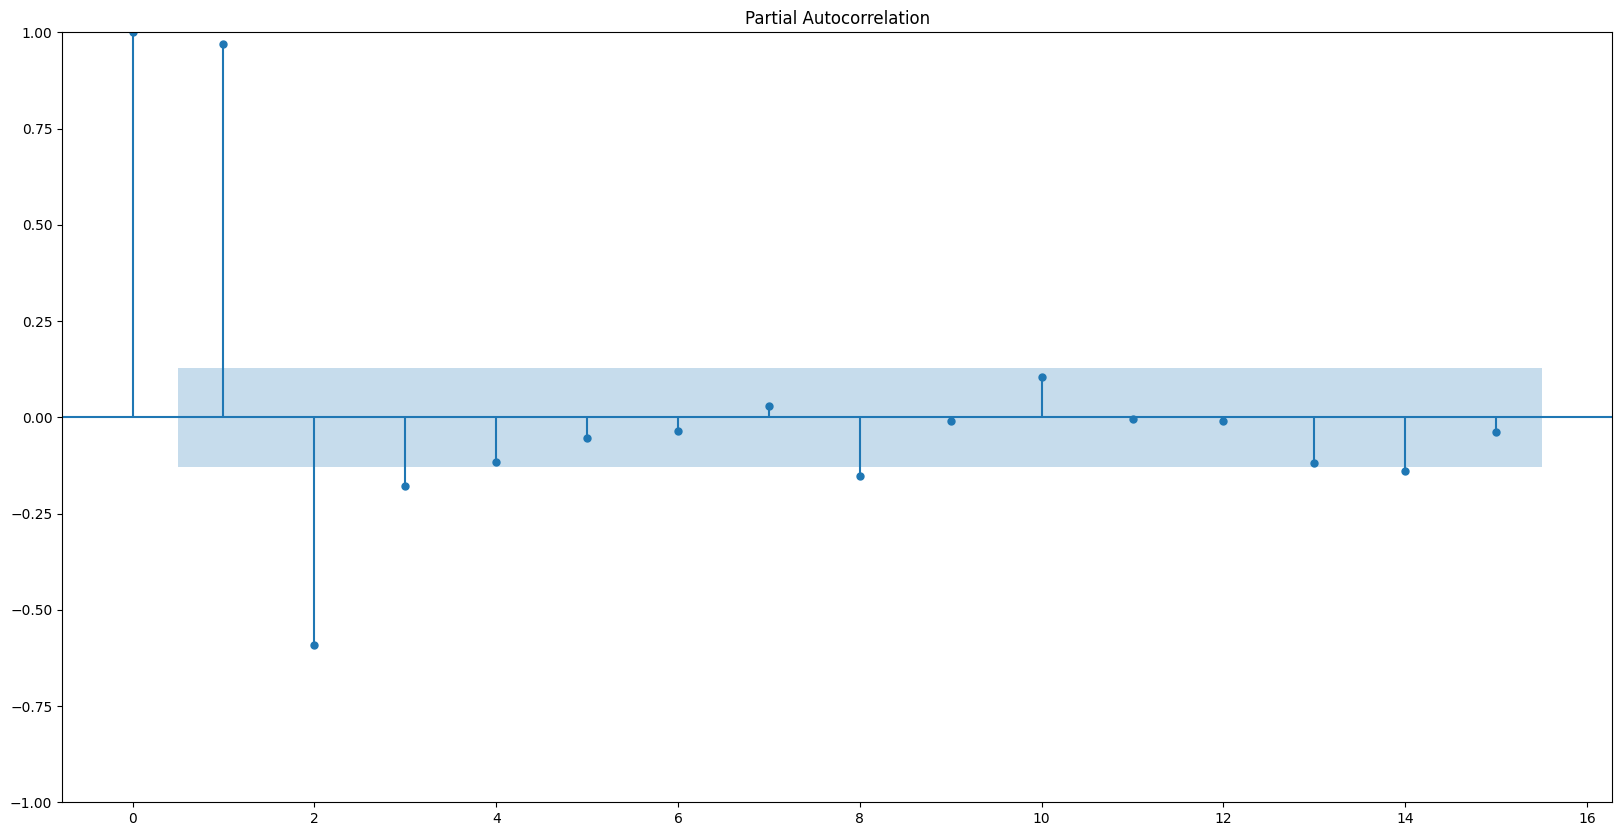

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
sm.graphics.tsa.plot_pacf(df_flu_pre_COVID.squeeze(), lags= 15)
plt.show()

In [ ]:
test.head(50)

,Total Cases,Name
Week Ending,,
2018-08-25,7.0,Test
2018-09-01,12.0,Test
2018-09-08,15.0,Test
2018-09-15,9.0,Test
2018-09-22,14.0,Test
2018-09-29,20.0,Test
2018-10-06,55.0,Test
2018-10-13,57.0,Test
2018-10-20,116.0,Test


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
#Creating a function so that iterating values becomes easier
def arima_model(p,d,q):
    #Split our data into train and test
    X = df_flu_pre_COVID
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    model = ARIMA(train, order=(p,d,q))  
    results_AR = model.fit()
    
    #Print summary statistics
    print(results_AR.summary())
    
    #Forecast for 6 months into the future
    fig, ax = plt.subplots()
    ax = df_flu_pre_COVID[:'2018-12-29'].plot(ax=ax)
    plot_predict(results_AR, '2018-08-25', '2018-12-29', ax=ax)
    plt.show()

    #Calculate MAPE and RMSE
    y_true, y_pred = np.array(train['Total Cases']), np.array(results_AR.fittedvalues)
    return np.mean(np.abs((y_true - y_pred) / y_true)), np.sqrt(sum((results_AR.fittedvalues-test['Total Cases'])**2)/len(test))


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-SAT will be used.

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-SAT will be used.

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-SAT will be used.



                               SARIMAX Results                                
Dep. Variable:            Total Cases   No. Observations:                  155
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1061.988
Date:                Tue, 22 Nov 2022   AIC                           2133.976
Time:                        23:11:50   BIC                           2149.193
Sample:                    09-05-2015   HQIC                          2140.157
                         - 08-18-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        922.9740    772.151      1.195      0.232    -590.414    2436.362
ar.L1          1.5056      0.063     23.906      0.000       1.382       1.629
ar.L2         -0.3906      0.108     -3.602      0.0

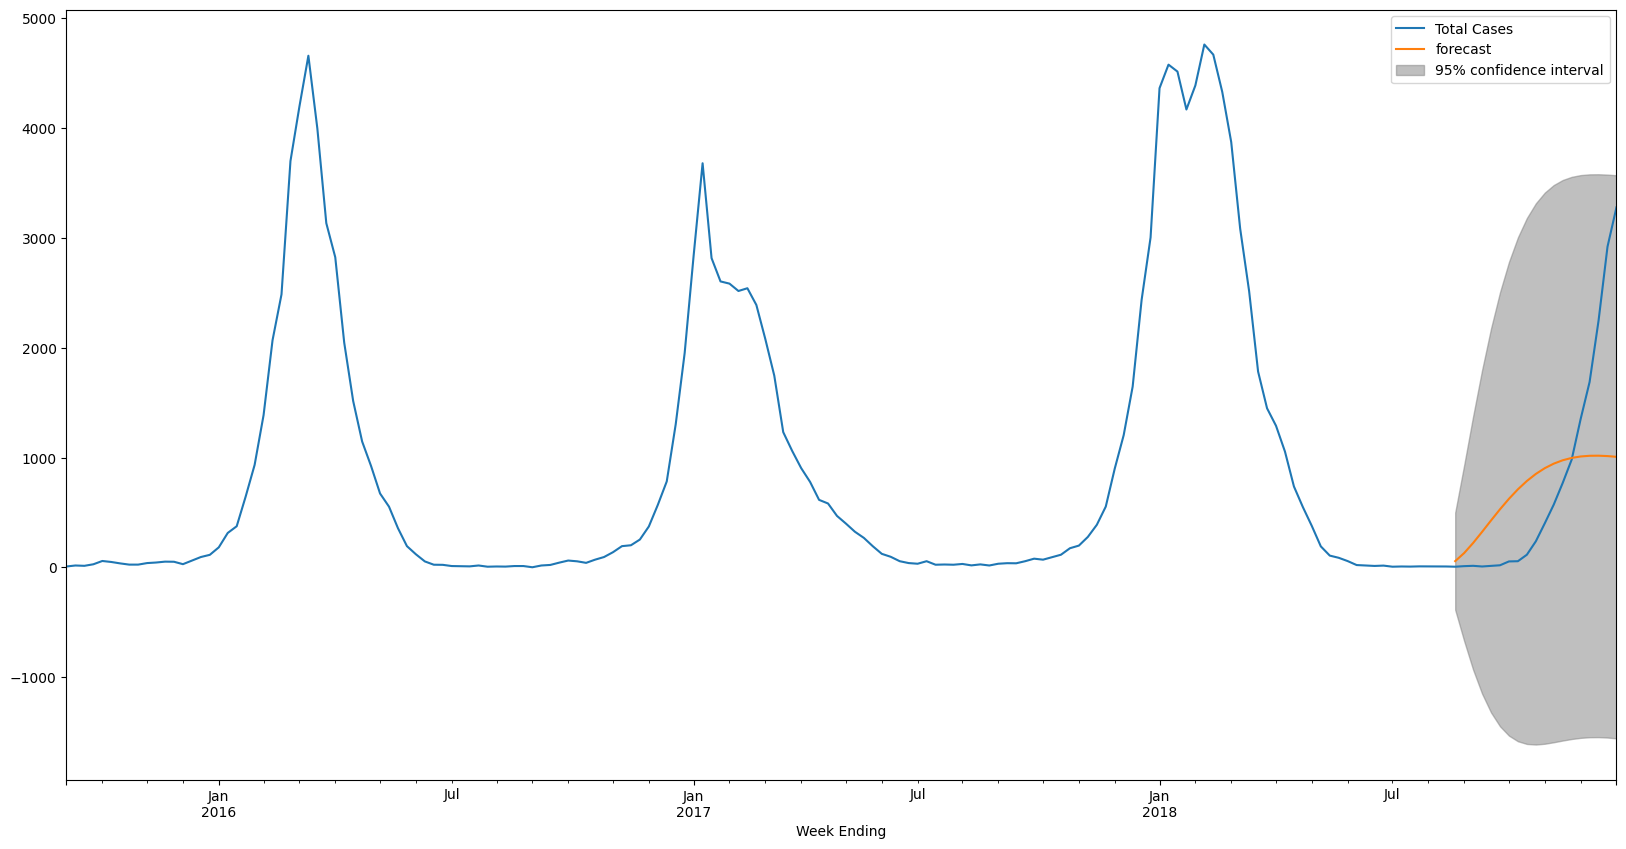

(1.8784018105884028, nan)

In [ ]:
arima_model(3,0,0)

In [ ]:
#Build seasonal arima
def sarimamodel(P,D,Q,m):
    X = df_flu_pre_COVID
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    smodel = sm.tsa.statespace.SARIMAX(train['Total Cases'], order=(1, 0, 1),seasonal_order=(P,D,Q,m))
    
    #Fit the model
    results_SAR = smodel.fit()
    #Summary statistics
    print(results_SAR.summary())

    #Prediction with confidence intervals
    pred = results_SAR.get_prediction(start=pd.to_datetime('2018-08-25'), dynamic=False)
    pred_ci = pred.conf_int()
    ax = df_flu_pre_COVID.plot(label='observed')
    pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(17, 7))
    
    
    # fig, ax = plt.subplots()
    # ax = df_flu_pre_COVID[:'2018-12-29'].plot(ax=ax)
    # plot_predict(results_AR, '2018-08-25', '2018-12-29', ax=ax)
    # plt.show()
    
    
    ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
    
    
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Cases')
    plt.legend()
    plt.show()
    
    #Understand the nature of residuals
    results_SAR.plot_diagnostics()
    
    #Accuracy Scores
    y_true, y_pred = np.array(train['Total Cases']), np.array(results_SAR.fittedvalues)
    return np.mean(np.abs((y_true - y_pred) / y_true)), np.sqrt(sum((results_SAR.fittedvalues-test['Total Cases'])**2)/len(test))
    


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-SAT will be used.

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-SAT will be used.



                                      SARIMAX Results                                      
Dep. Variable:                         Total Cases   No. Observations:                  155
Model:             SARIMAX(1, 0, 1)x(0, 1, [], 12)   Log Likelihood               -1060.488
Date:                             Tue, 22 Nov 2022   AIC                           2126.976
Time:                                     23:16:39   BIC                           2135.864
Sample:                                 09-05-2015   HQIC                          2130.588
                                      - 08-18-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9553      0.020     46.885      0.000       0.915       0.995
ma.L1          0.5579      

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>)

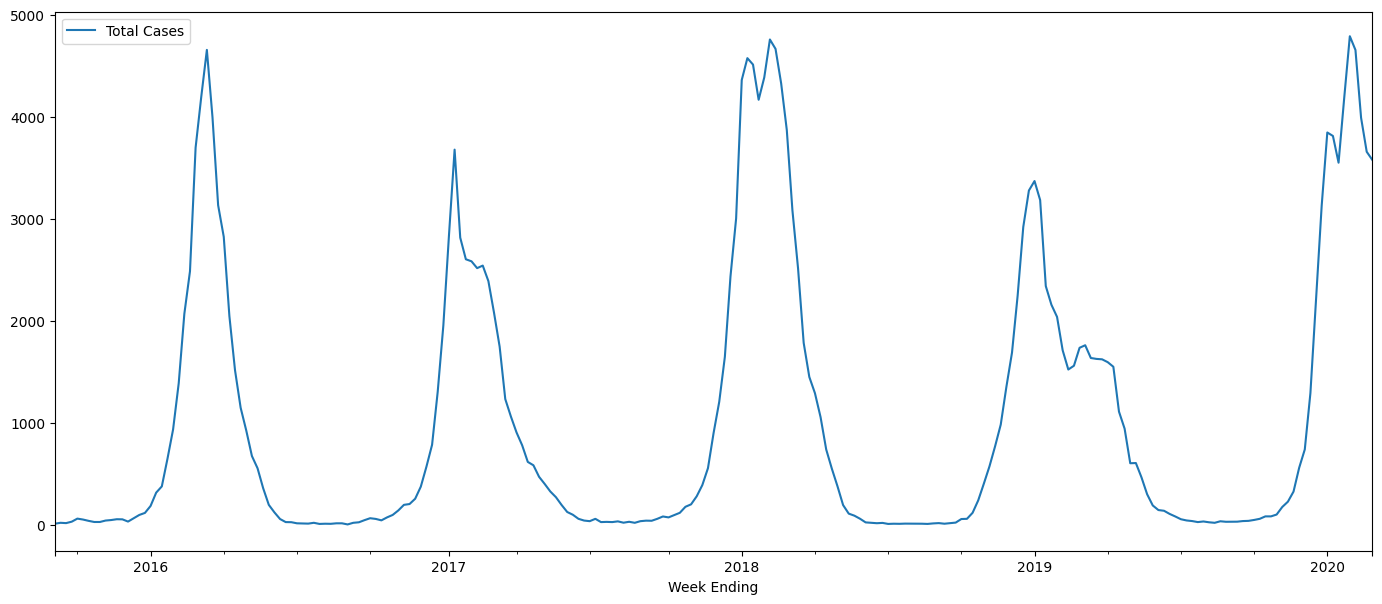

In [ ]:
sarimamodel(0,1,0,12)
sarimamodel(1,0,0,12)
sarimamodel(0,0,1,12)

# Prophet - pre-COVID

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import prophet
from prophet import Prophet

In [ ]:
wmt = df_flu_pre_COVID
wmt = wmt.reset_index('Week Ending')
wmt.head()

,Week Ending,Total Cases
0,2015-09-05,9.0
1,2015-09-12,18.0
2,2015-09-19,15.0
3,2015-09-26,29.0
4,2015-10-03,59.0


In [ ]:
wmt.rename(columns={'Week Ending':'ds','Total Cases':'y'}, inplace=True)

In [ ]:
wmt['ds'] = pd.to_datetime(wmt['ds'])

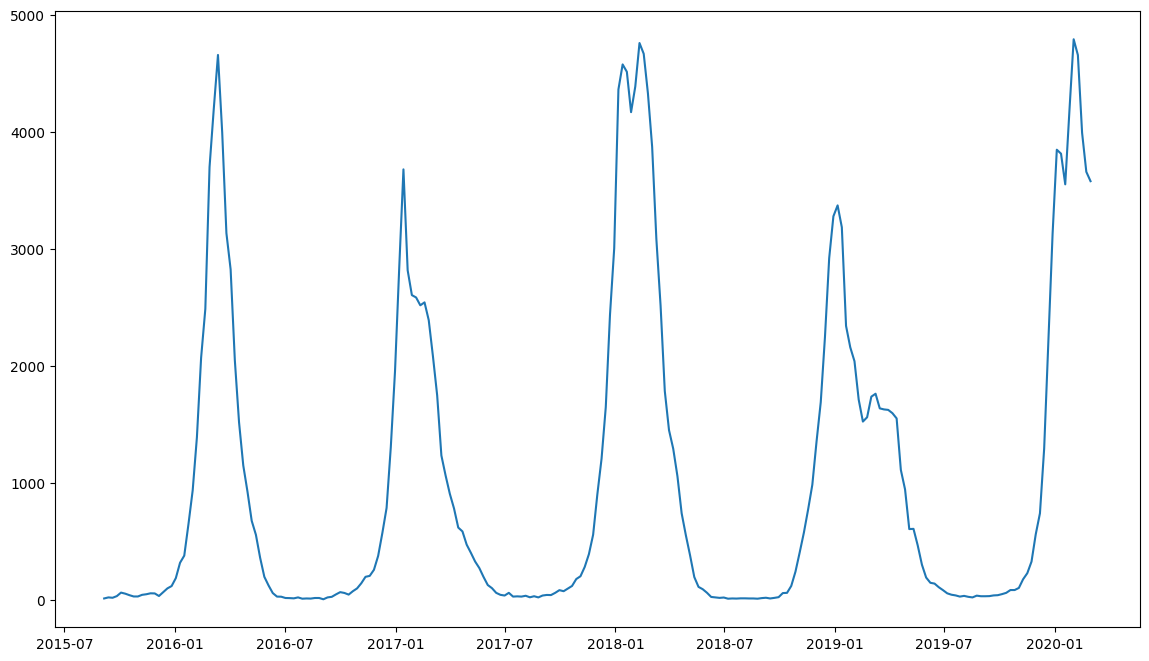

In [ ]:
plt.figure(figsize = (14,8))
plt.plot(wmt['ds'], wmt['y'])
plt.show()

In [ ]:
m = Prophet()

In [ ]:
m.fit(wmt)

21:40:03 - cmdstanpy - INFO - Chain [1] start processing
21:40:03 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

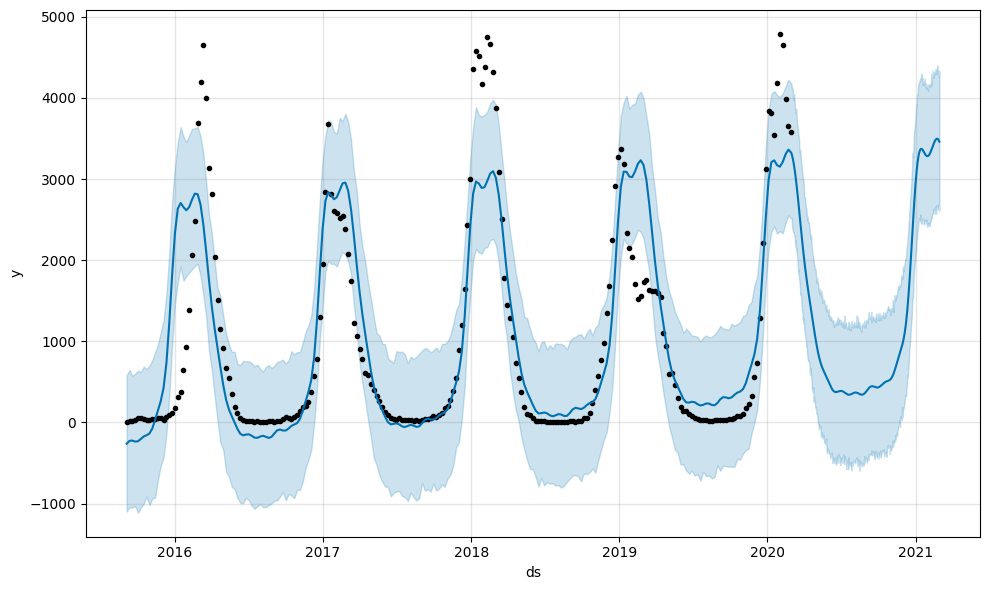

In [ ]:
fig1 = m.plot(forecast)

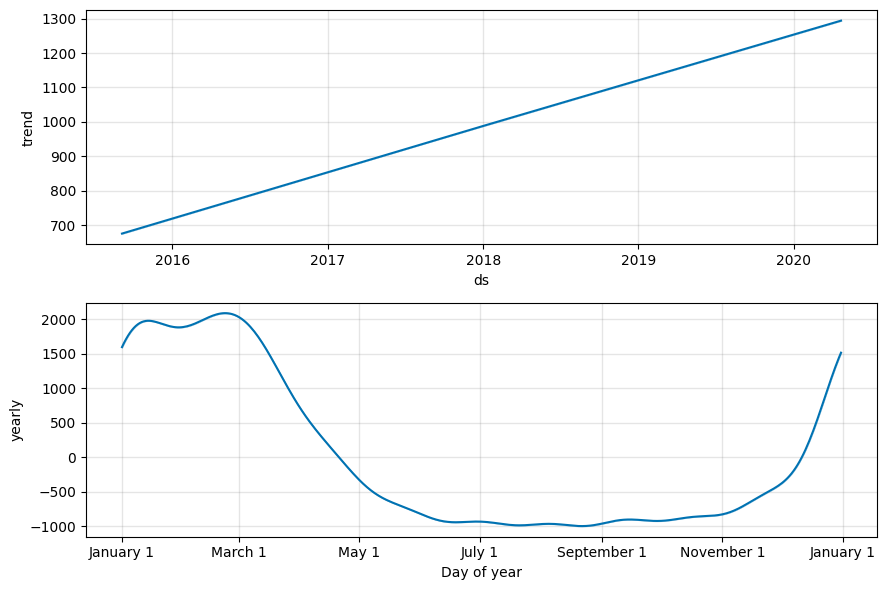

In [ ]:
fig2 = m.plot_components(forecast)

# Prophet - post-COVID

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import prophet
from prophet import Prophet

In [ ]:
df_flu.head()

,Surveillance Week,A(H1N1)pdm09,A(H3N2),A(Unsubtyped),Influenza B,Year,Total Cases,Epiweek,Week Ending
0,35,1.0,2.0,3.0,3.0,2015,9.0,201535,2015-09-05
1,36,2.0,11.0,5.0,0.0,2015,18.0,201536,2015-09-12
2,37,0.0,10.0,4.0,1.0,2015,15.0,201537,2015-09-19
3,38,0.0,16.0,13.0,0.0,2015,29.0,201538,2015-09-26
4,39,6.0,34.0,13.0,6.0,2015,59.0,201539,2015-10-03


In [ ]:
wmt = df_flu[['Week Ending', 'Total Cases']]
wmt.head()

,Week Ending,Total Cases
0,2015-09-05,9.0
1,2015-09-12,18.0
2,2015-09-19,15.0
3,2015-09-26,29.0
4,2015-10-03,59.0


In [ ]:
wmt.rename(columns={'Week Ending':'ds','Total Cases':'y'}, inplace=True)

In [ ]:
wmt['ds'] = pd.to_datetime(wmt['ds'])

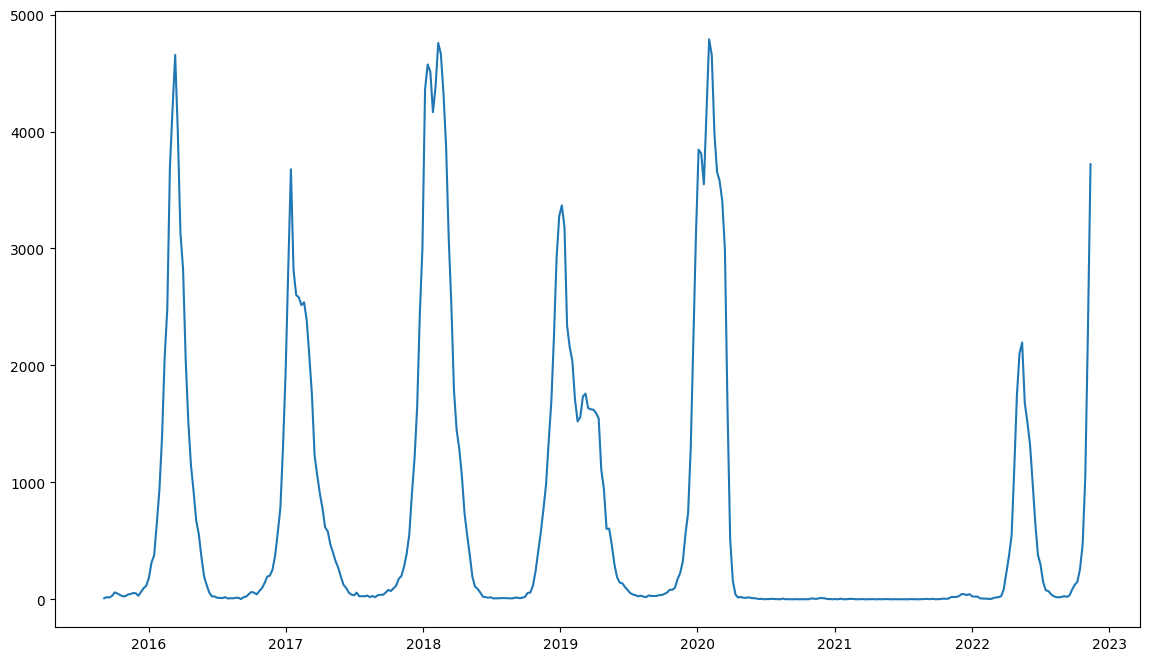

In [ ]:
plt.figure(figsize = (14,8))
plt.plot(wmt['ds'], wmt['y'])
plt.show()

In [ ]:
m = Prophet()

In [ ]:
m.fit(wmt)

21:47:22 - cmdstanpy - INFO - Chain [1] start processing
21:47:22 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

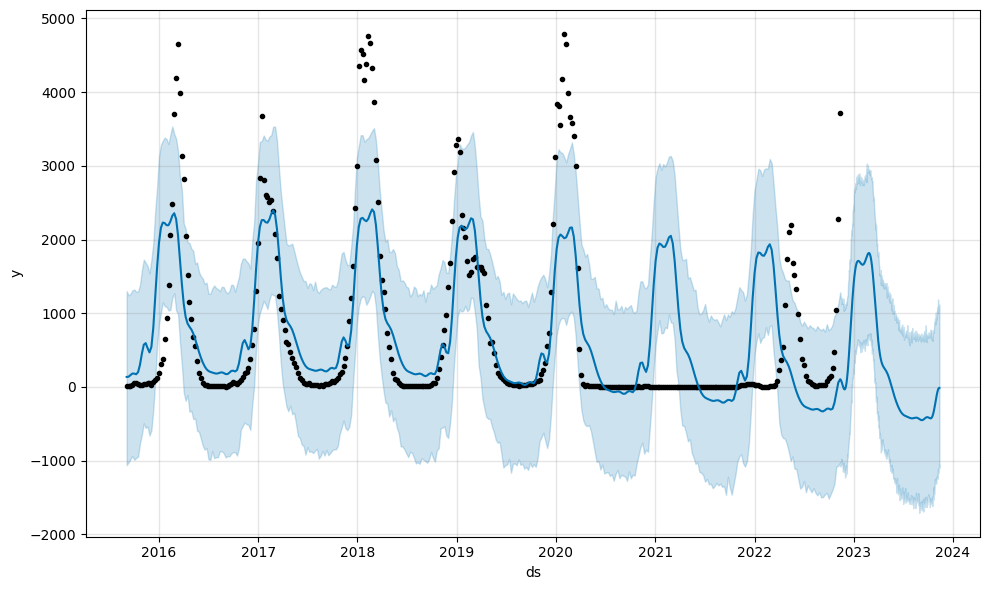

In [ ]:
fig1 = m.plot(forecast)

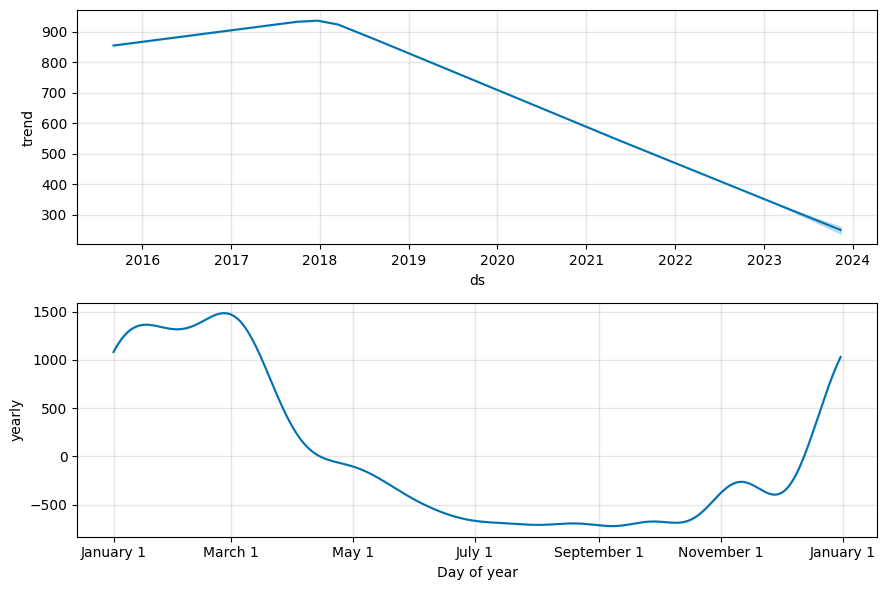

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
rolling = df_flu['Total Cases'].rolling(window=4)
rolling_mean = rolling.mean().dropna()
print(rolling_mean)

Week Ending
2015-09-26      17.75
2015-10-03      30.25
2015-10-10      38.25
2015-10-17      43.75
2015-10-24      43.00
               ...   
2022-10-15     153.75
2022-10-22     250.00
2022-10-29     479.00
2022-11-05    1011.50
2022-11-12    1877.00
Name: Total Cases, Length: 373, dtype: float64


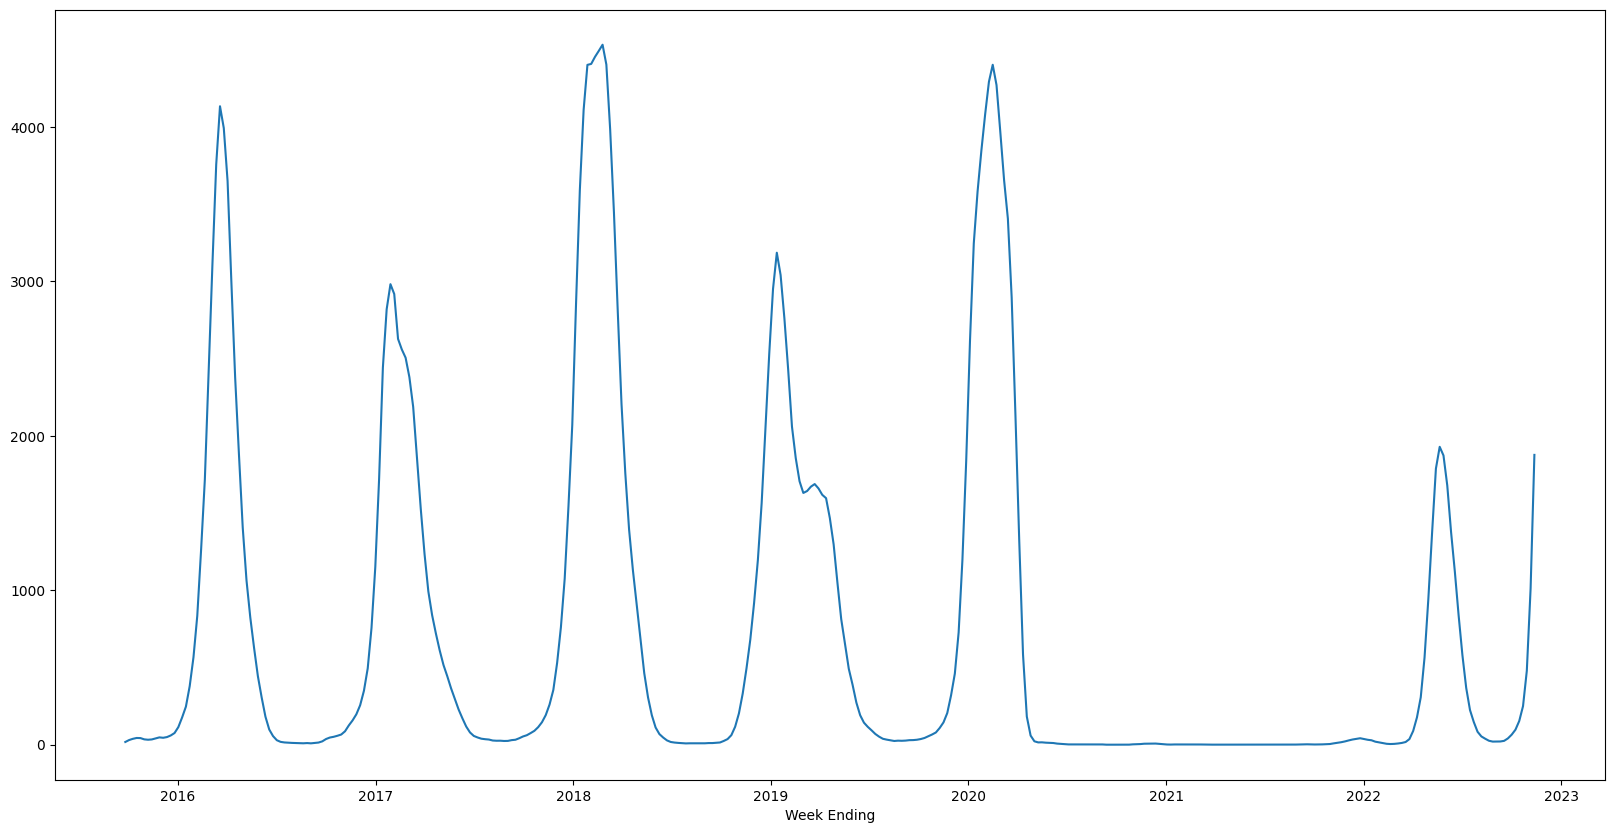

In [ ]:
rolling_mean.plot()
plt.show()

In [ ]:
rolling = df_flu['Total Cases'].rolling(window=4)
rolling_std = rolling.std().dropna()
print(rolling_std)

Week Ending
2015-09-26       8.381527
2015-10-03      20.089384
2015-10-10      19.956202
2015-10-17      13.351030
2015-10-24      14.491377
                 ...     
2022-10-15      75.256783
2022-10-22     156.718431
2022-10-29     396.712322
2022-11-05     907.196598
2022-11-12    1443.120462
Name: Total Cases, Length: 373, dtype: float64


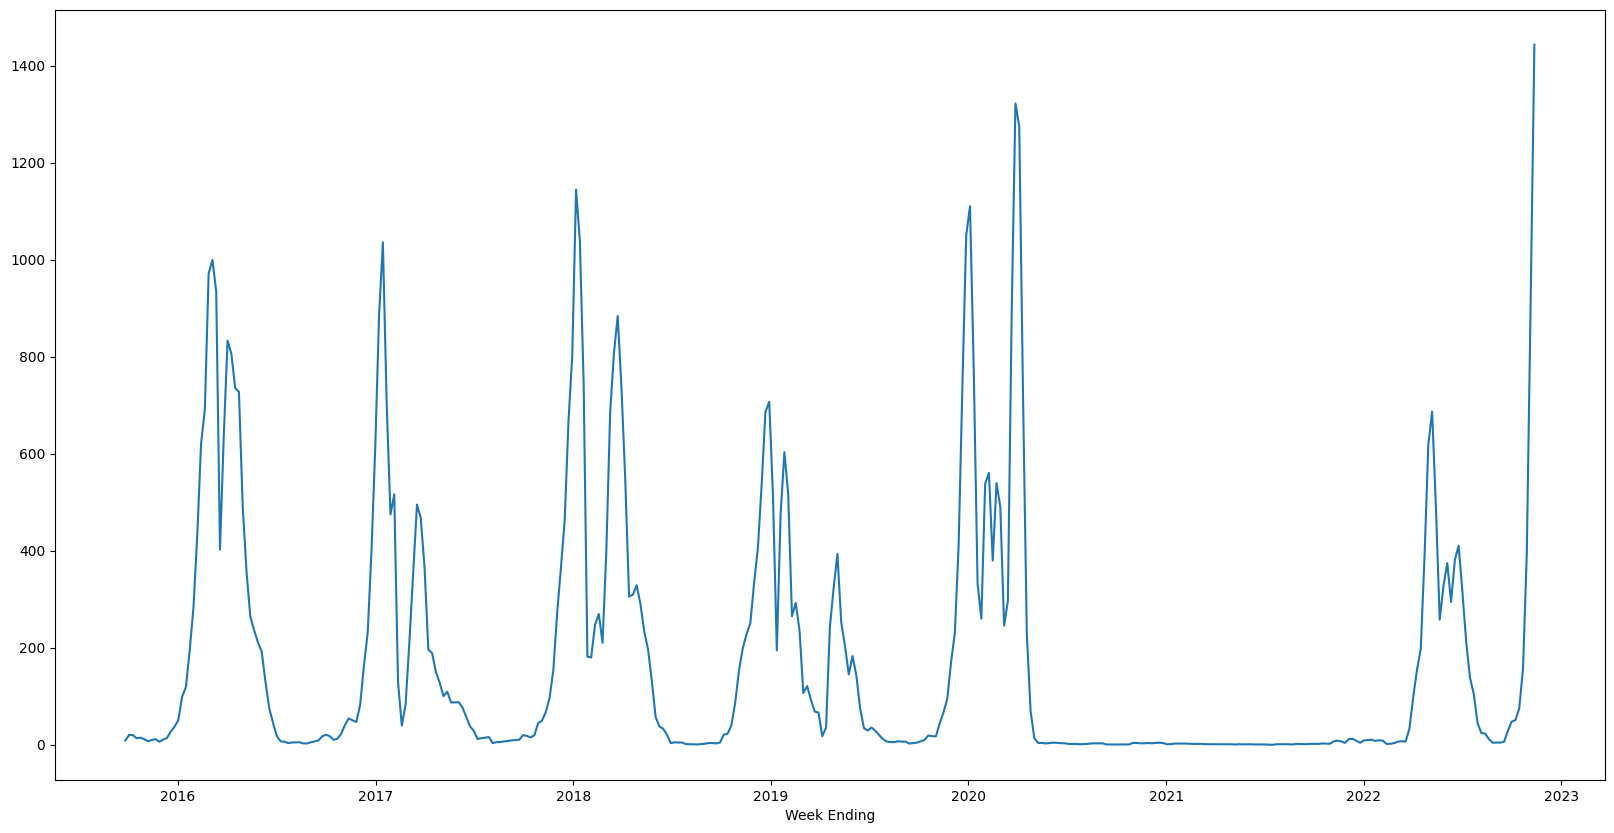

In [ ]:
rolling_std.plot()
plt.show()

In [ ]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters

In [ ]:
df_flu_pre_COVID.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235 entries, 2015-09-05 to 2020-02-29
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Total Cases  235 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


In [ ]:
def ADF_Stationarity_Test(timeseries, significance_level):
    from statsmodels.tsa.stattools import adfuller
    import pandas as pd
    timeseries = pd.DataFrame(timeseries)
    X = timeseries.values
    significance_level_trans = round(significance_level*100)
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
	    print('\t%s: %.3f' % (key, value))
    key = str(significance_level_trans)+'%'
    if result[0] <= result[4][key]:
        print('Based on a significance level of %s, this time series is stationary' % significance_level)
    else:
        print('Based on a significance level of %s, this time series is non-stationary' % significance_level)

In [ ]:
ADF_Stationarity_Test(timeseries=df_flu_pre_COVID, significance_level=0.05)

ADF Statistic: -4.008630
p-value: 0.001366
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574
Based on a significance level of 0.05, this time series is stationary


In [ ]:
d = 0

In [ ]:
from statsmodels.tsa.stattools import pacf
pacf(df_flu_pre_COVID)

array([ 1.        ,  0.97020525, -0.5910531 , -0.17856183, -0.11669712,
       -0.05384971, -0.03644637,  0.0285333 , -0.15331433, -0.00946545,
        0.10540962, -0.00564435, -0.00837434, -0.11837565, -0.14051683,
       -0.03727803, -0.04376063, -0.05661477, -0.03624588, -0.06960944,
       -0.06441512,  0.0028184 , -0.06464248, -0.06857709])

In [ ]:
p = 3

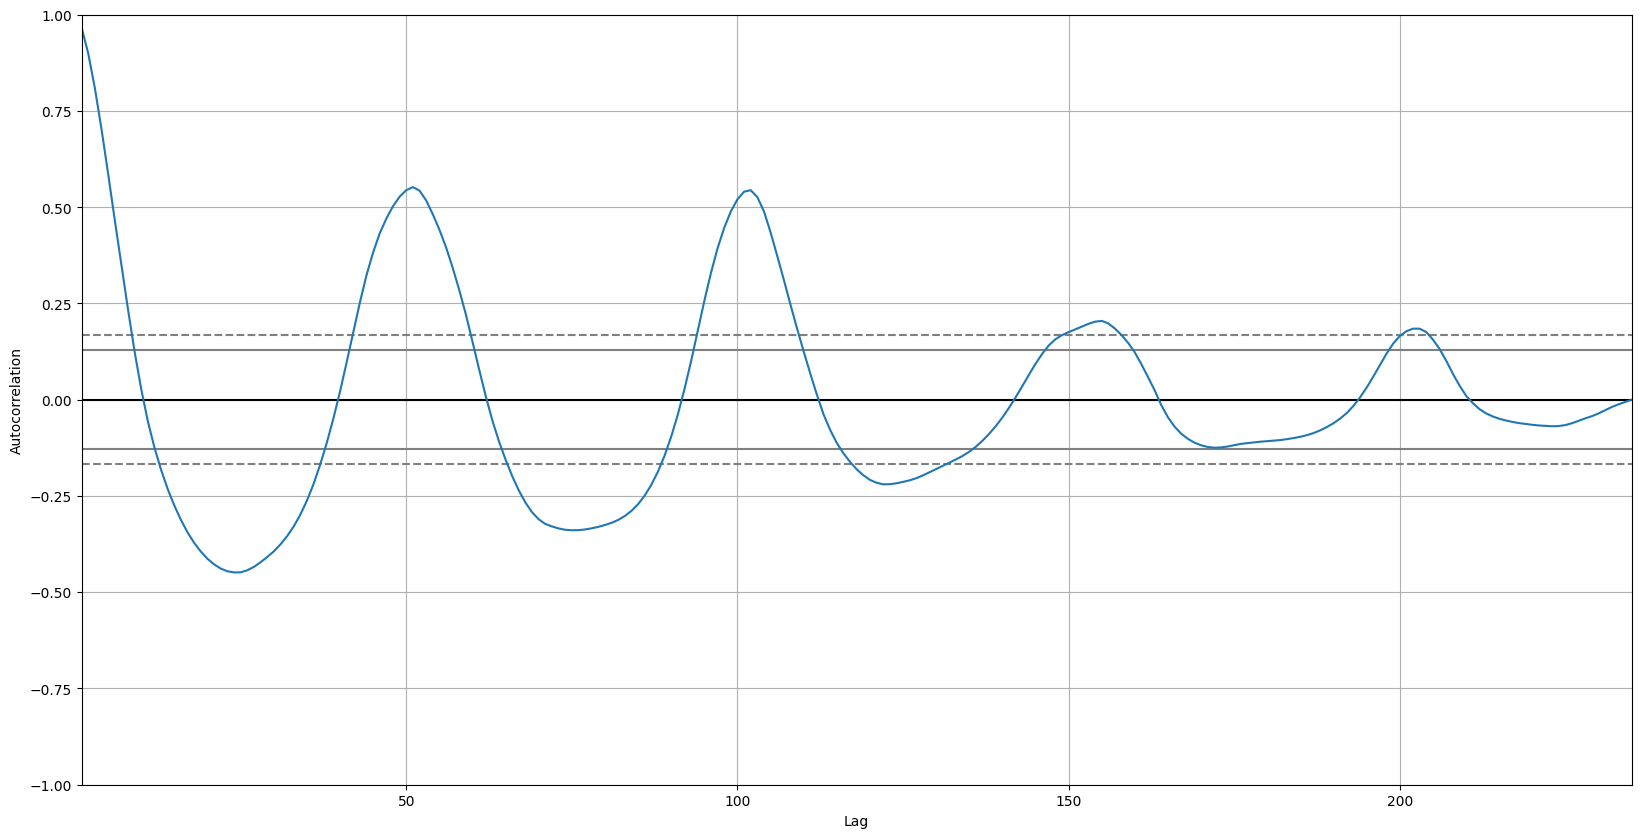

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_flu_pre_COVID)
plt.show()

In [ ]:
q = 5

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:            Total Cases   No. Observations:                  235
Model:                 ARIMA(3, 0, 5)   Log Likelihood               -1597.925
Date:                Tue, 22 Nov 2022   AIC                           3215.849
Time:                        17:54:06   BIC                           3250.445
Sample:                    09-05-2015   HQIC                          3229.797
                         - 02-29-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1009.9312    105.783      9.547      0.000     802.601    1217.261
ar.L1          1.5341      0.564      2.722      0.006       0.430       2.639
ar.L2         -0.1641      1.088     -0.151      0.8

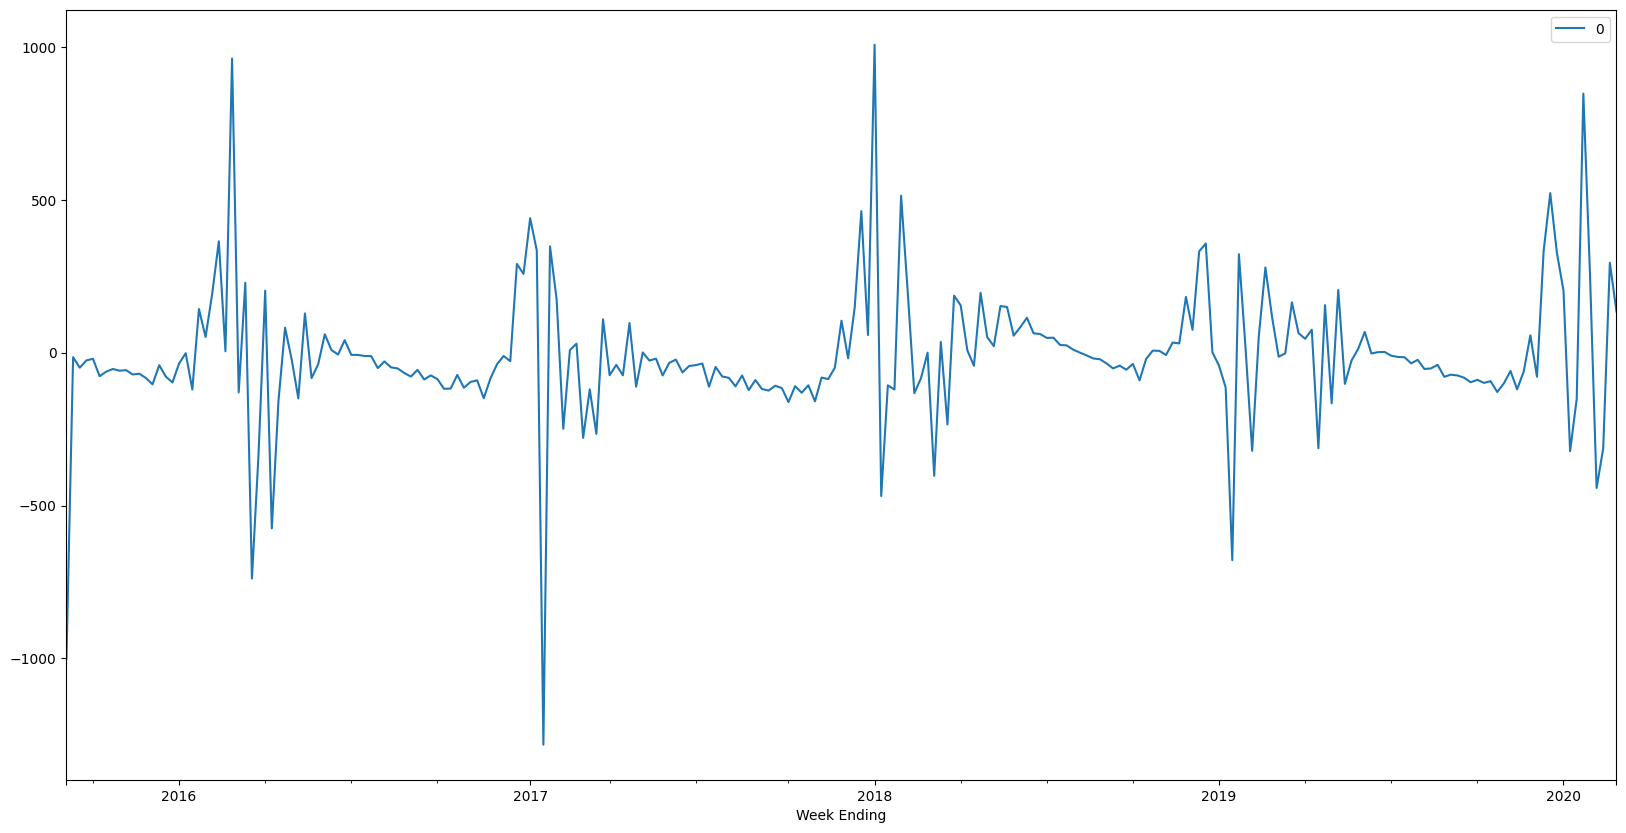

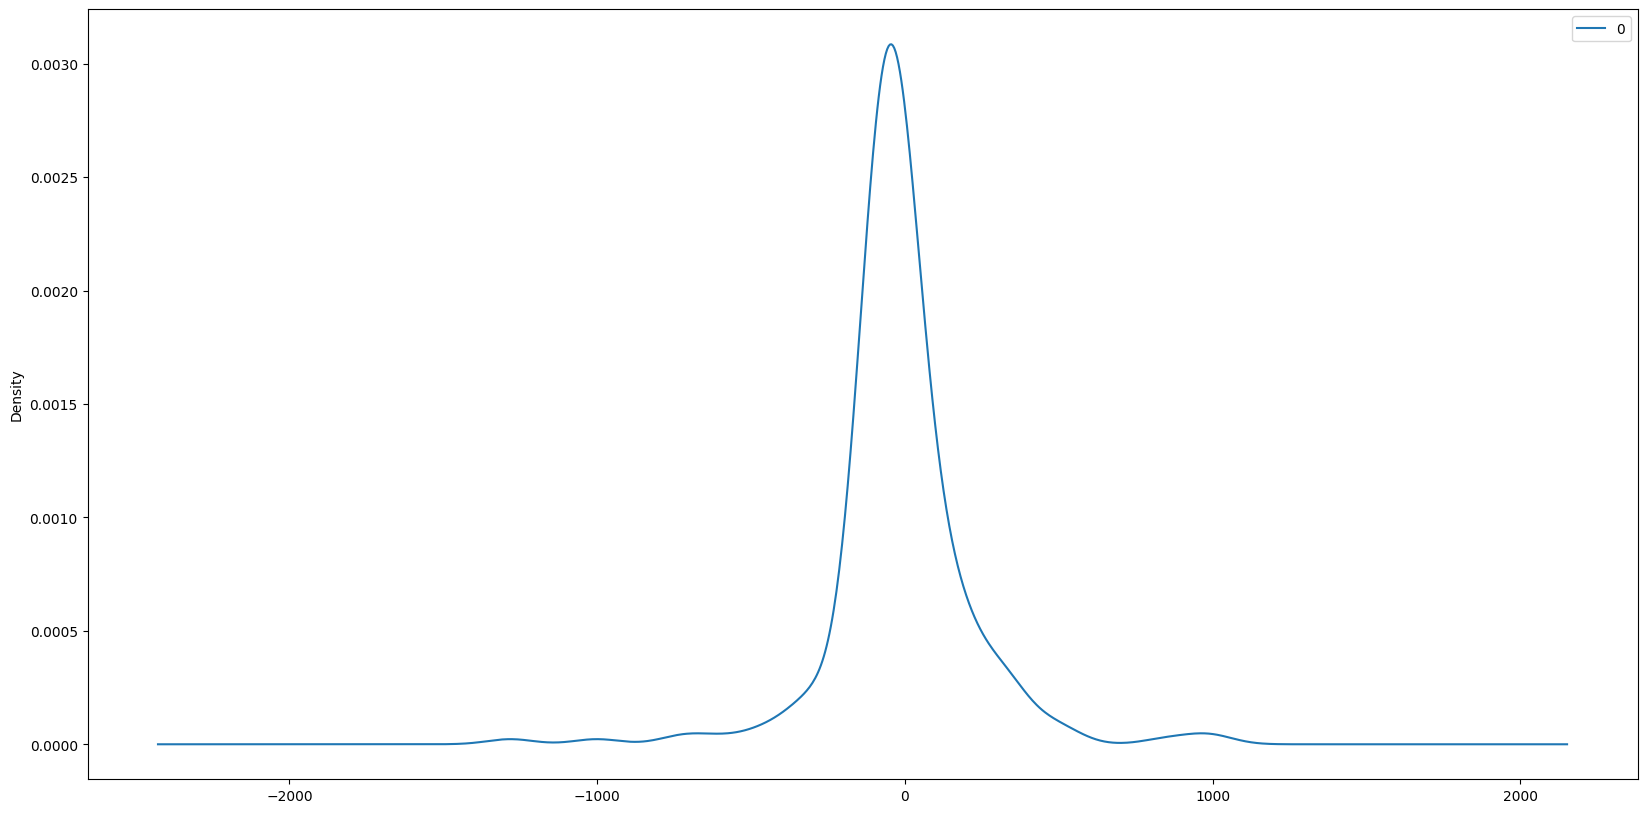

                 0
count   235.000000
mean    -13.592953
std     224.356346
min   -1282.134820
25%     -88.155758
50%     -34.765989
75%      50.160231
max    1007.335018


In [ ]:
X = df_flu_pre_COVID
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train['Total Cases']]
predictions = list()

# fit model
model = ARIMA(df_flu_pre_COVID, order=(p,d,q))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
train

,Total Cases
Week Ending,
2015-09-05,9.0
2015-09-12,18.0
2015-09-19,15.0
2015-09-26,29.0
2015-10-03,59.0
...,...
2018-07-21,8.0
2018-07-28,10.0
2018-08-04,10.0


In [ ]:
test

,Total Cases
Week Ending,
2018-08-25,7.0
2018-09-01,12.0
2018-09-08,15.0
2018-09-15,9.0
2018-09-22,14.0
...,...
2020-02-01,4789.0
2020-02-08,4654.0
2020-02-15,3989.0


In [ ]:
history

[9.0,
 18.0,
 15.0,
 29.0,
 59.0,
 50.0,
 37.0,
 26.0,
 26.0,
 40.0,
 45.0,
 53.0,
 52.0,
 30.0,
 63.0,
 95.0,
 115.0,
 183.0,
 314.0,
 375.0,
 645.0,
 933.0,
 1386.0,
 2067.0,
 2484.0,
 3697.0,
 4193.0,
 4655.0,
 3994.0,
 3132.0,
 2822.0,
 2045.0,
 1514.0,
 1146.0,
 922.0,
 673.0,
 553.0,
 357.0,
 194.0,
 120.0,
 55.0,
 25.0,
 24.0,
 13.0,
 12.0,
 10.0,
 18.0,
 7.0,
 9.0,
 8.0,
 13.0,
 13.0,
 2.0,
 18.0,
 23.0,
 44.0,
 63.0,
 56.0,
 42.0,
 71.0,
 95.0,
 139.0,
 194.0,
 202.0,
 254.0,
 373.0,
 569.0,
 783.0,
 1303.0,
 1952.0,
 2837.0,
 3677.0,
 2814.0,
 2602.0,
 2582.0,
 2515.0,
 2540.0,
 2388.0,
 2078.0,
 1745.0,
 1231.0,
 1060.0,
 904.0,
 778.0,
 615.0,
 582.0,
 469.0,
 399.0,
 325.0,
 269.0,
 193.0,
 124.0,
 97.0,
 57.0,
 40.0,
 34.0,
 57.0,
 25.0,
 27.0,
 25.0,
 32.0,
 19.0,
 28.0,
 18.0,
 34.0,
 39.0,
 38.0,
 57.0,
 80.0,
 71.0,
 93.0,
 116.0,
 175.0,
 199.0,
 278.0,
 388.0,
 554.0,
 899.0,
 1204.0,
 1645.0,
 2434.0,
 3002.0,
 4360.0,
 4574.0,
 4511.0,
 4166.0,
 4385.0,
 4757.0,
 

In [ ]:
model = ARIMA(df_flu_pre_COVID, order=(p,d,q))
model_fit = model.fit()
output = model_fit.forecast(steps=len(test))
output

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2020-03-07    3458.329213
2020-03-14    3173.094729
2020-03-21    2775.420426
2020-03-28    2386.558783
2020-04-04    1987.096515
                 ...     
2021-08-14     751.212301
2021-08-21     852.714276
2021-08-28     953.129410
2021-09-04    1050.734663
2021-09-11    1143.921705
Freq: W-SAT, Name: predicted_mean, Length: 80, dtype: float64

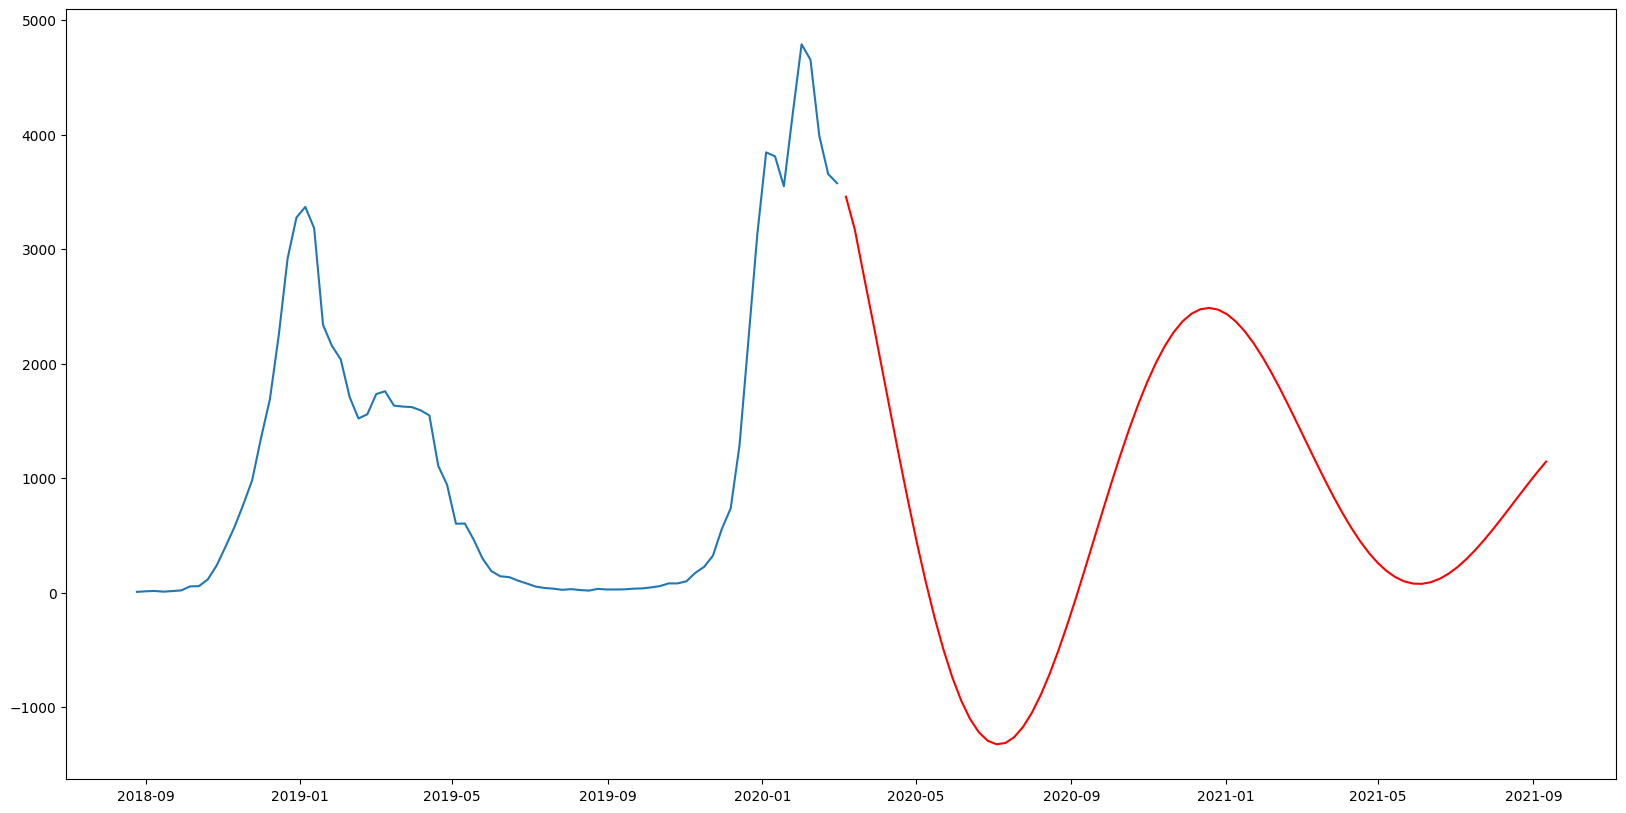

In [ ]:
plt.plot(test)
plt.plot(output, color='red')
plt.show()

In [ ]:
len(history)

235

In [ ]:
len(predictions)

80

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-6.574116, expected=7.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-9.991966, expected=12.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3.307598, expected=15.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=9.938243, expected=9.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=41.438061, expected=14.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=19.434492, expected=20.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=37.976880, expected=55.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=112.052244, expected=57.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.113235, expected=116.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=176.077155, expected=238.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=357.666512, expected=402.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=548.107027, expected=572.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=702.646931, expected=769.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=912.132689, expected=981.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1133.602051, expected=1350.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1574.126355, expected=1687.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1895.089420, expected=2245.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2529.176916, expected=2918.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3274.016471, expected=3276.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3440.967983, expected=3369.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3280.944810, expected=3182.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2978.465191, expected=2339.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1795.695180, expected=2156.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1898.980976, expected=2037.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2010.025810, expected=1709.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1500.534863, expected=1521.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1229.680284, expected=1558.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1513.306559, expected=1734.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1792.853582, expected=1759.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1666.267864, expected=1634.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1432.867991, expected=1625.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1514.931839, expected=1621.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1548.269876, expected=1593.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1473.219132, expected=1548.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1413.220934, expected=1108.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=799.872282, expected=941.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=742.657594, expected=602.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=392.804091, expected=604.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=555.156571, expected=463.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=347.440644, expected=298.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=169.280280, expected=188.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=68.604862, expected=143.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=127.273735, expected=136.000000
predicted=115.721516, expected=105.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=81.257529, expected=80.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=58.295913, expected=53.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.930055, expected=41.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=47.247620, expected=35.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=52.678886, expected=25.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=39.802789, expected=31.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=67.945889, expected=23.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=59.997452, expected=18.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=60.163415, expected=33.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=91.226825, expected=28.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=86.761215, expected=28.000000
predicted=85.177708, expected=29.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=93.373817, expected=35.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=108.751966, expected=37.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=110.320062, expected=46.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=125.423783, expected=57.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=145.406916, expected=81.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=175.467647, expected=81.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=165.329549, expected=99.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=191.850849, expected=173.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=297.446473, expected=225.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=346.113851, expected=324.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=452.063590, expected=557.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=759.958479, expected=737.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=922.383860, expected=1290.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1622.040431, expected=2206.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=2763.487171, expected=3126.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3667.280446, expected=3845.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=4171.138977, expected=3811.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3667.517523, expected=3549.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=3255.449493, expected=4182.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=4469.517176, expected=4789.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5146.518996, expected=4654.000000


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=4312.427964, expected=3989.000000
predicted=3312.915937, expected=3656.000000
predicted=3427.278802, expected=3576.000000
Test RMSE: 215.812


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


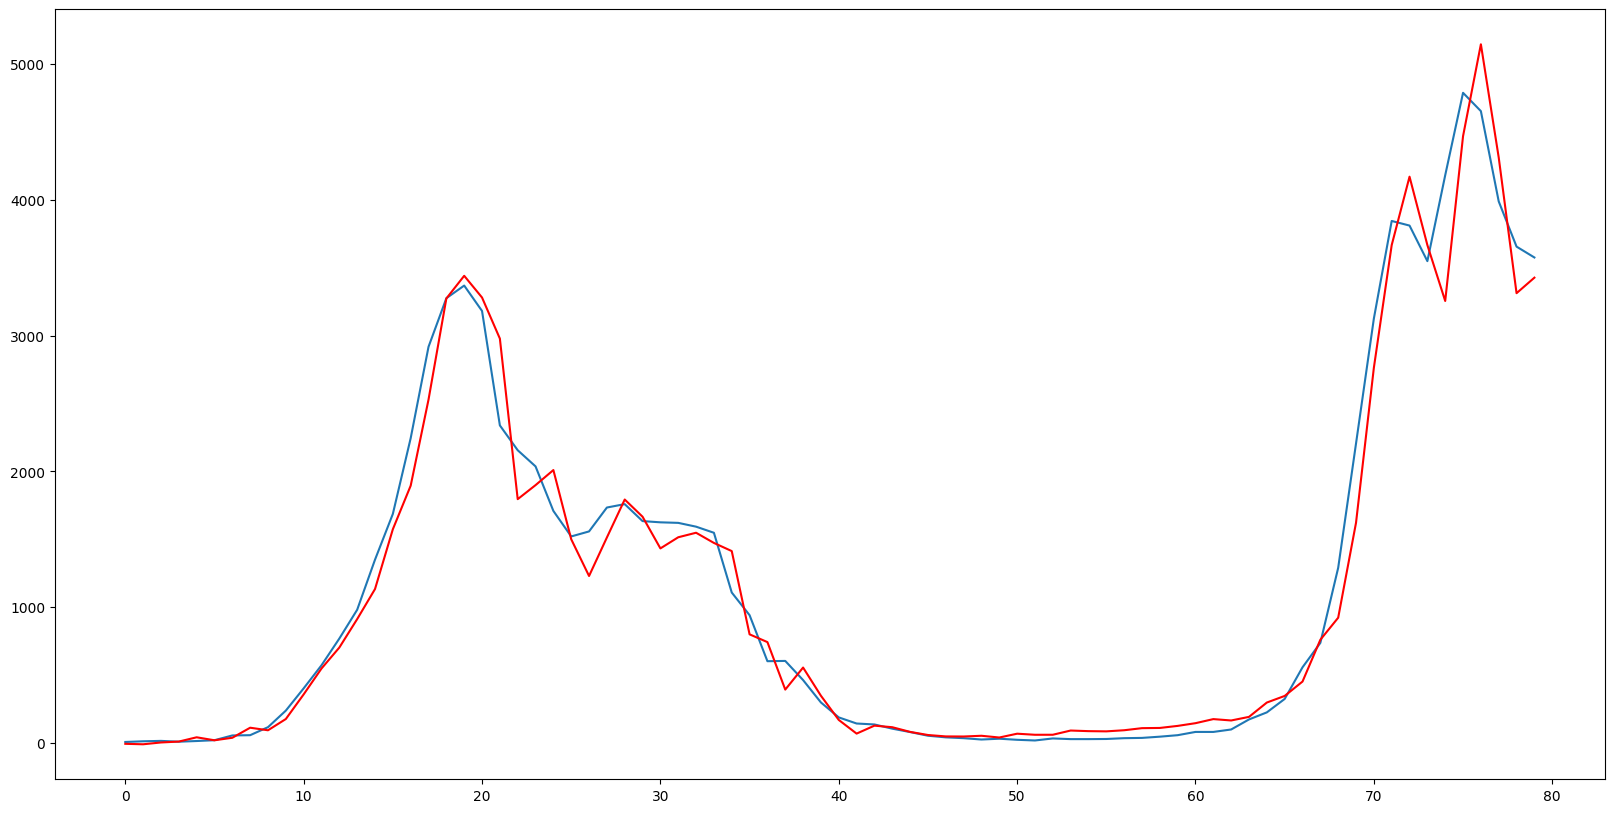

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(p,d,q))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test['Total Cases'][t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
plt.plot(test.values)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
! pip install chart_studio

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 64.4/64.4 kB 266.9 kB/s eta 0:00:00


In [ ]:
! pip install cufflinks

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 81.7/81.7 kB 99.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68718 sha256=bc756893ece24d77aad79d15ce1dc7656a34b11b75e60c66977918e1c0068cfd
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\32\f7\bd\3b5f431b9a740489de249dad87142f8ee000b7c6b6e8e58d54
Successfully built cufflinks


In [ ]:
import chart_studio.plotly as ply
import cufflinks as cf
df_flu.iplot(title="Canadian Influenza Cases")


KeyboardInterrupt

